In [1]:
! pip install category_encoders


In [1]:

import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno
import datetime as dt
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


ModuleNotFoundError: No module named 'seaborn'

### ***Helper funcation tom detect outliers***

In [3]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[(df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))]
    return outliers

# Reading and Understanding the data

In [4]:
sns.set_style("darkgrid")

In [5]:
df=pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
df.shape

(19237, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [8]:
df.rename(columns={'Prod. year':'year'},inplace=True)
df.head()

,ID,Price,Levy,Manufacturer,Model,year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


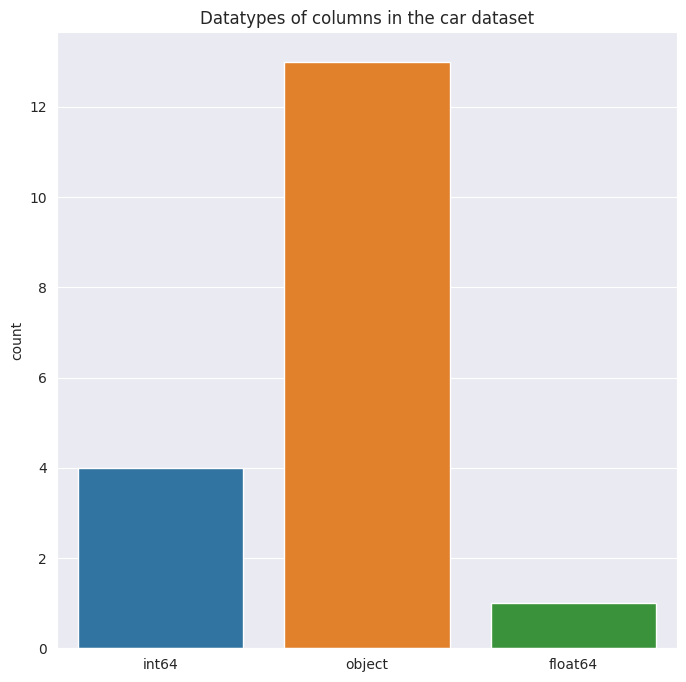

Count of the datatypes of columns
object     13
int64       4
float64     1
dtype: int64


In [9]:
plt.figure(figsize=(8,8))
sns.countplot(x=df.dtypes)
plt.title("Datatypes of columns in the car dataset")
plt.show()
print("Count of the datatypes of columns")
print(df.dtypes.value_counts())

In [10]:
df.isnull().sum() #checking whether there are null values in the dataset

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
year                0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

<AxesSubplot: >

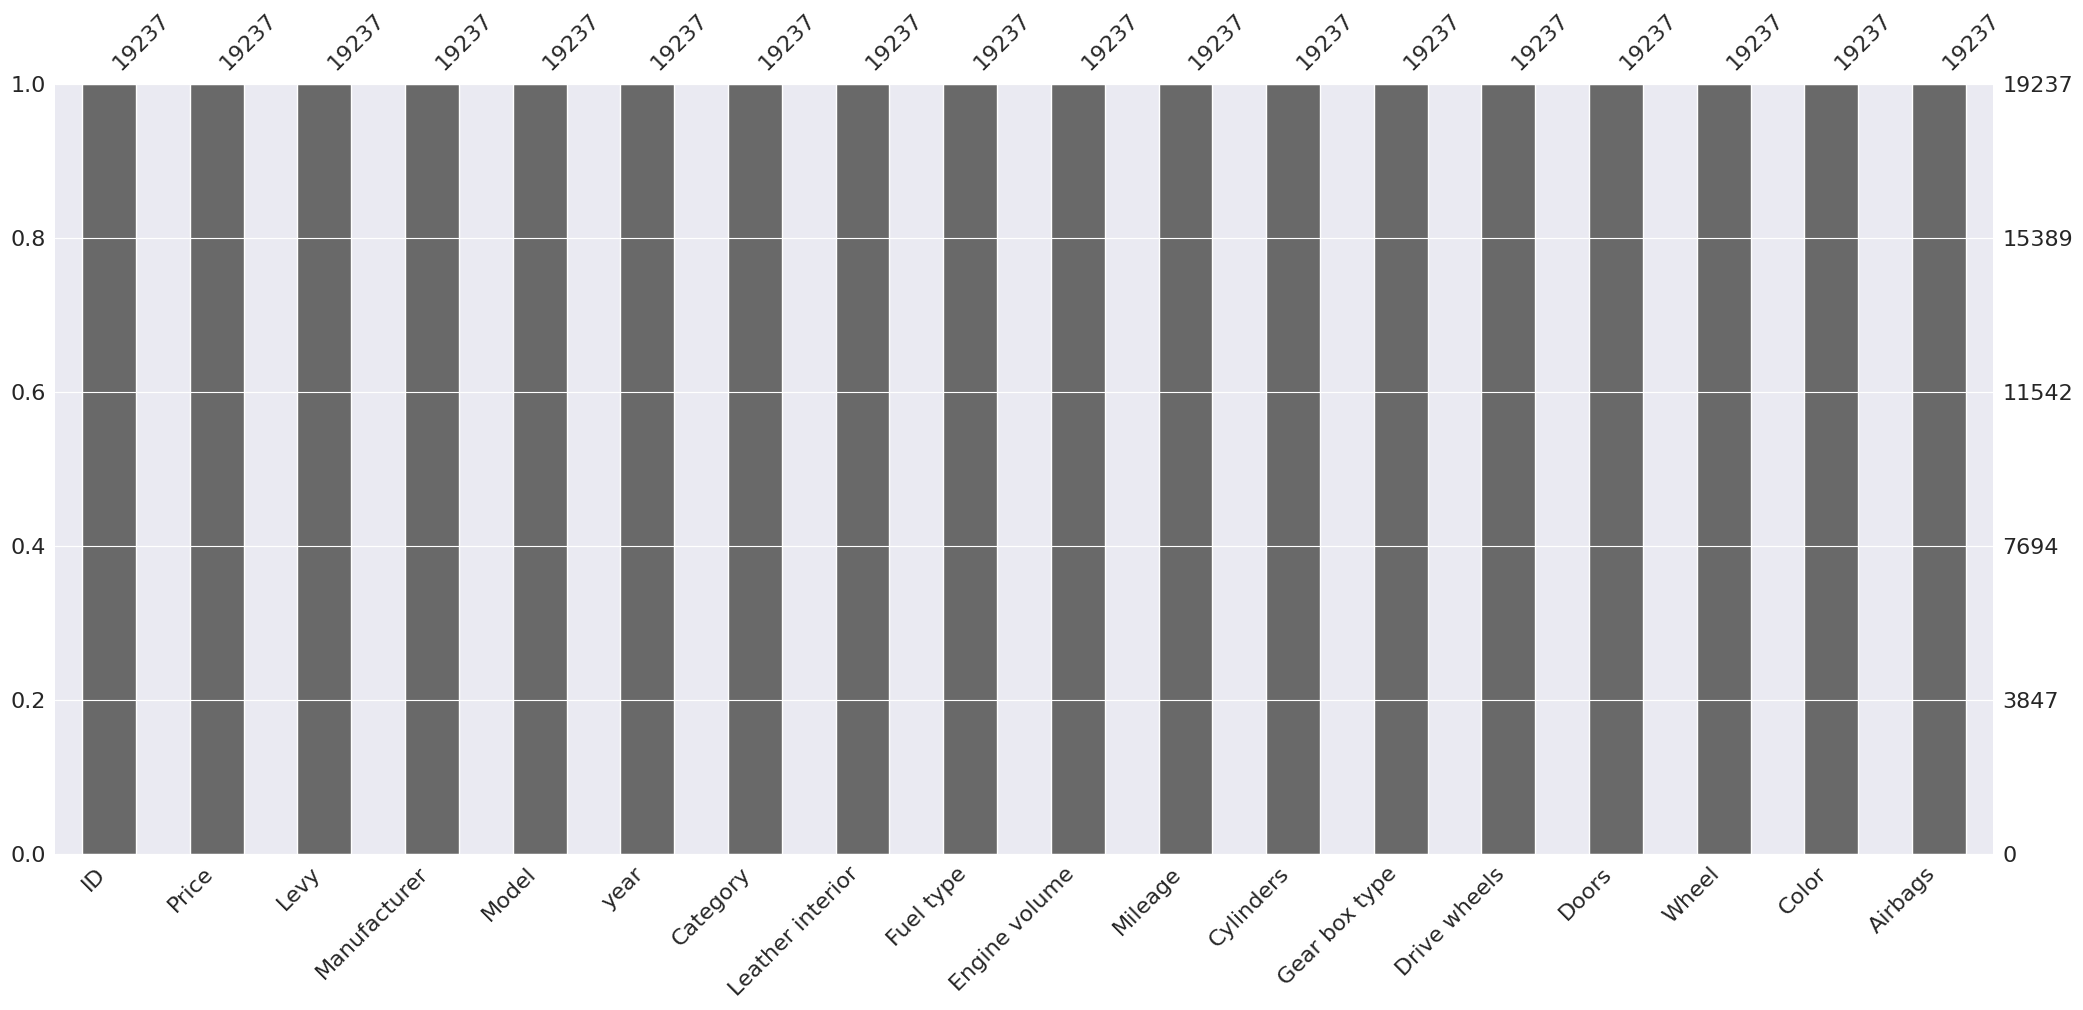

In [11]:
missingno.bar(df)

# Data Preprocessing:

In [12]:
df.columns=df.columns.str.lower().str.replace(" ","_")
df.head()

,id,price,levy,manufacturer,model,year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [13]:
df.shape

(19237, 18)

In [14]:
df.describe()

,id,price,year,cylinders,airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [15]:
df.duplicated().sum() # to find the number of duplicate rows

313

In [16]:
df.loc[df.duplicated()]

,id,price,levy,manufacturer,model,year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [17]:
df.drop_duplicates(inplace = True)
df.drop('id',axis = 1,inplace = True)
print(f'This DataSet Contains {df.shape[0]} rows & {df.shape[1]} columns.')
df.shape

This DataSet Contains 18924 rows & 17 columns.


(18924, 17)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             18924 non-null  int64  
 1   levy              18924 non-null  object 
 2   manufacturer      18924 non-null  object 
 3   model             18924 non-null  object 
 4   year              18924 non-null  int64  
 5   category          18924 non-null  object 
 6   leather_interior  18924 non-null  object 
 7   fuel_type         18924 non-null  object 
 8   engine_volume     18924 non-null  object 
 9   mileage           18924 non-null  object 
 10  cylinders         18924 non-null  float64
 11  gear_box_type     18924 non-null  object 
 12  drive_wheels      18924 non-null  object 
 13  doors             18924 non-null  object 
 14  wheel             18924 non-null  object 
 15  color             18924 non-null  object 
 16  airbags           18924 non-null  int64 

## Columns in the dataset:

In [19]:
df.columns

Index(['price', 'levy', 'manufacturer', 'model', 'year', 'category',
       'leather_interior', 'fuel_type', 'engine_volume', 'mileage',
       'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color',
       'airbags'],
      dtype='object')

### Doors

In [20]:
df['doors']

0        04-May
1        04-May
2        04-May
3        04-May
4        04-May
          ...  
19232    02-Mar
19233    04-May
19234    04-May
19235    04-May
19236    04-May
Name: doors, Length: 18924, dtype: object

In [21]:
df['doors'].value_counts()

04-May    18032
02-Mar      768
>5          124
Name: doors, dtype: int64

In [22]:
#replacing the dates with the number of doors present in the car
df['doors'] = df['doors'].str.replace('04-May','4-5')
df['doors'] = df['doors'].str.replace('02-Mar','2-3')
df['doors'].value_counts()

4-5    18032
2-3      768
>5       124
Name: doors, dtype: int64

### Levy

In [23]:
df['levy']

0        1399
1        1018
2           -
3         862
4         446
         ... 
19232       -
19233     831
19234     836
19235    1288
19236     753
Name: levy, Length: 18924, dtype: object

In [24]:
#  replace '-' with '0'
df['levy'] = df['levy'].replace(['-'],['0'])
df['levy'] = df['levy'].astype(str).astype(int)
df['levy']

0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: levy, Length: 18924, dtype: int64

### Engine Volume

In [25]:
df['engine_volume']

0              3.5
1                3
2              1.3
3              2.5
4              1.3
           ...    
19232    2.0 Turbo
19233          2.4
19234            2
19235            2
19236          2.4
Name: engine_volume, Length: 18924, dtype: object

In [26]:
df['engine_volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [27]:
df['engine_volume'].value_counts()

2            3856
2.5          2246
1.8          1743
1.6          1446
1.5          1289
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: engine_volume, Length: 107, dtype: int64

In [28]:
# Remove the string 'Turbo'.
# Convert the datatype of the column from object to float.
df['turbo'] = df['engine_volume'].str.contains("Turbo").map({False:0,True:1})
df['engine_volume']=df['engine_volume'].str.replace('Turbo','')
df['engine_volume']= df['engine_volume'].astype(str).astype(float)
df['engine_volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: engine_volume, Length: 18924, dtype: float64

In [29]:
df['turbo']

0        0
1        0
2        0
3        0
4        0
        ..
19232    1
19233    0
19234    0
19235    0
19236    0
Name: turbo, Length: 18924, dtype: int64

###  Mileage

In [30]:
df['mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: mileage, Length: 18924, dtype: object

In [31]:
# Remove the string 'KM'.
# Convert it to 'int' datatype.

df['mileage']=df['mileage'].str.replace('km','')
df['mileage']= df['mileage'].astype(str).astype(int)
df['mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: mileage, Length: 18924, dtype: int64

### Price

In [32]:
df['price']

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19232     8467
19233    15681
19234    26108
19235     5331
19236      470
Name: price, Length: 18924, dtype: int64

<AxesSubplot: >

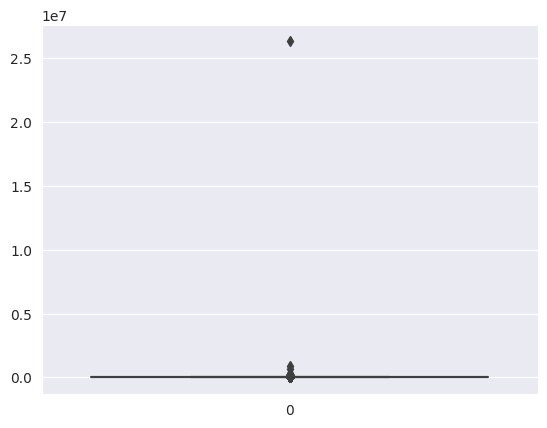

In [33]:
sns.boxplot(df['price'])

In [34]:
price_outliers=find_outliers_IQR(df['price'])
df.drop(price_outliers.index,inplace=True)

<AxesSubplot: xlabel='price', ylabel='Density'>

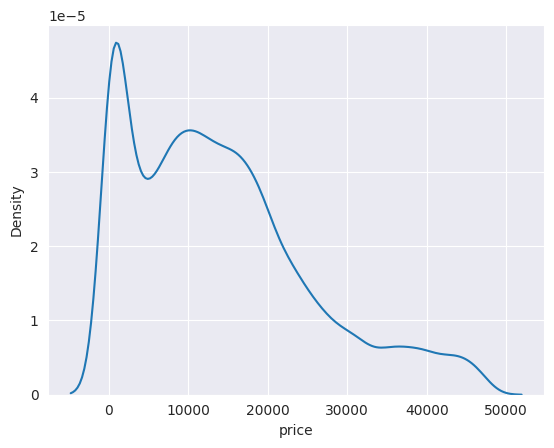

In [35]:
sns.kdeplot(df['price'])

<AxesSubplot: >

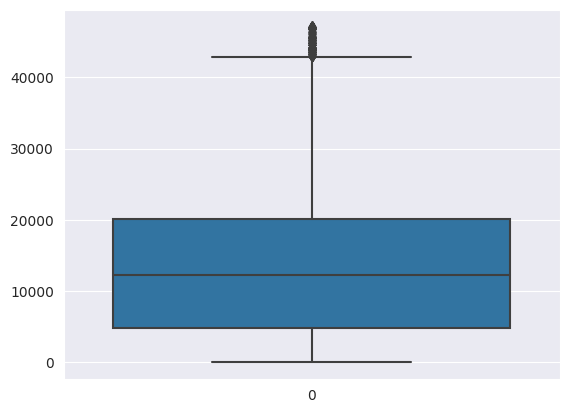

In [36]:
sns.boxplot(df['price'])

In [37]:
med=df['price'].median()
df.loc[find_outliers_IQR(df['price']).index,'price']=med
df['price']

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19232     8467
19233    15681
19234    26108
19235     5331
19236      470
Name: price, Length: 17869, dtype: int64

## Exploratory Data Analysis:

### Univariate Analysis:

#### Levy

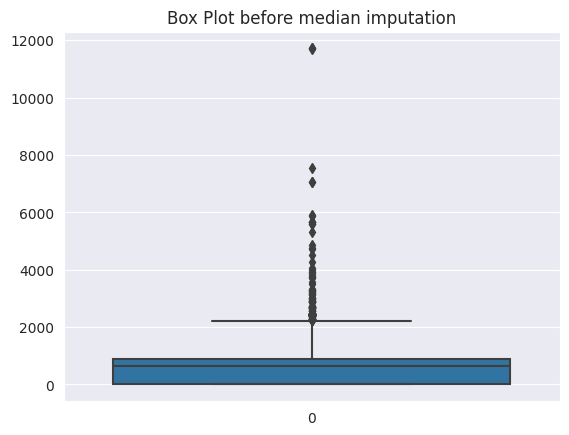

In [38]:

sns.boxplot(df['levy'])
plt.title("Box Plot before median imputation")
plt.show()

In [39]:
med=df['levy'].median()
df.loc[find_outliers_IQR(df['levy']).index,'levy']=med
df['levy']

0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: levy, Length: 17869, dtype: int64

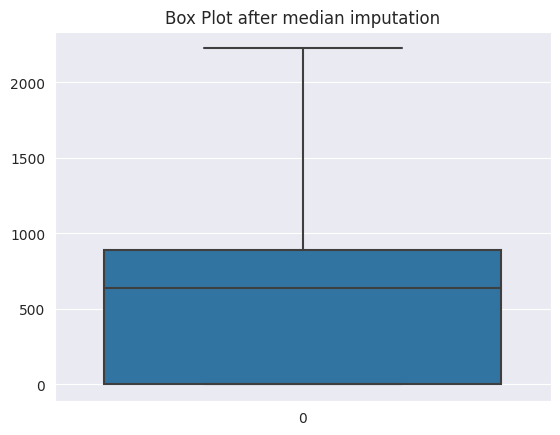

In [40]:

sns.boxplot(df['levy'])
plt.title("Box Plot after median imputation")
plt.show()

In [41]:
df.drop(find_outliers_IQR(df['levy']).index,inplace=True)

#### engine_volume

In [42]:
df['engine_volume'].value_counts().sort_values(ascending=False).head(10)

2.0    3922
2.5    2250
1.8    1917
1.6    1541
1.5    1313
3.5    1116
2.4    1015
3.0     963
1.3     532
1.4     516
Name: engine_volume, dtype: int64

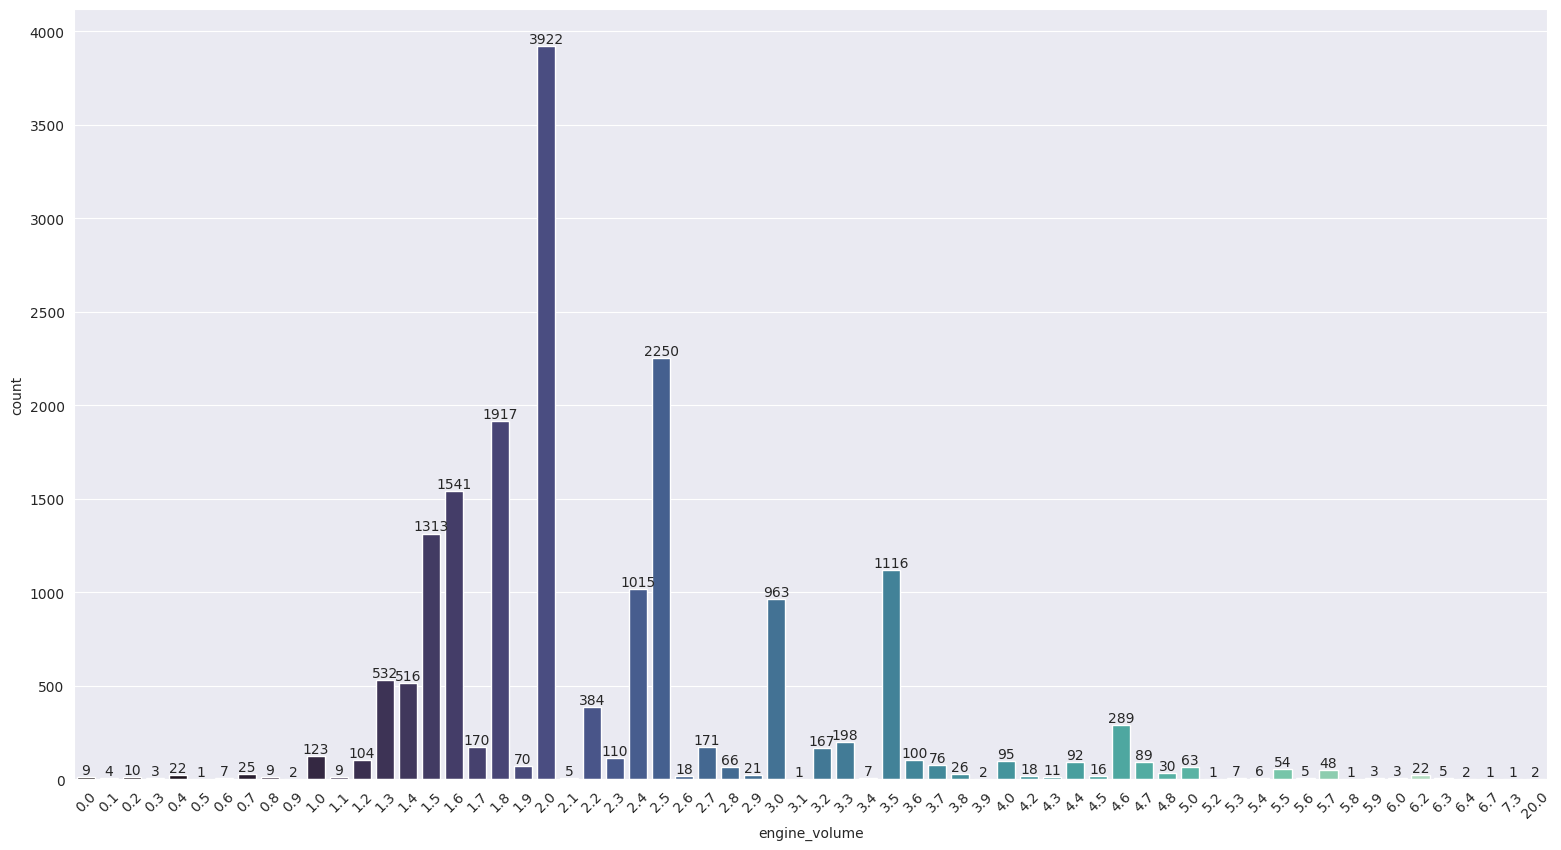

In [43]:
plt.figure(figsize=(19,10))
c1=sns.countplot(x='engine_volume',data=df,palette="mako")
plt.xticks(rotation=45)
c1.bar_label(c1.containers[0],size = 10)
plt.show()

* Majority of the cars produced has a 2L engine volume.

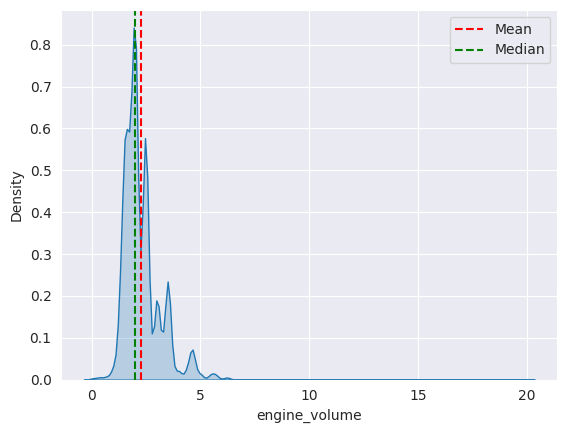

In [44]:
sns.kdeplot(data=df,x='engine_volume',fill=True)
plt.axvline(np.mean(df['engine_volume']), linestyle='--', c='r', label="Mean")
plt.axvline(np.median(df['engine_volume']), linestyle='--', c='g', label="Median")
plt.legend()
plt.show()

* The values present in the Engine volume column are positively skewed. "mean sensitive to outlier"

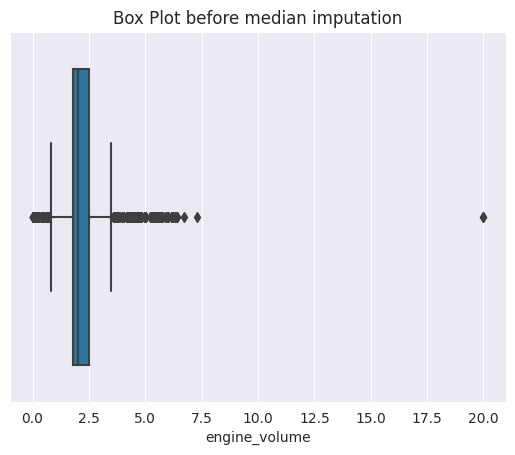

In [45]:
sns.boxplot(x=df['engine_volume'])
plt.title("Box Plot before median imputation")
plt.show()

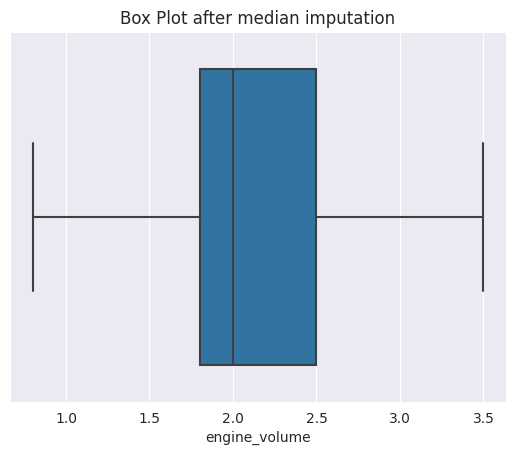

In [46]:
engine_volume_outliers=find_outliers_IQR(df['engine_volume'])
med=df['engine_volume'].median()
df.loc[engine_volume_outliers.index,'engine_volume'] = med
sns.boxplot(x=df['engine_volume'])
plt.title("Box Plot after median imputation")
plt.show() 

#### Turbo

In [47]:
turbo_values=df['turbo'].value_counts()
turbo_values

0    16218
1     1651
Name: turbo, dtype: int64

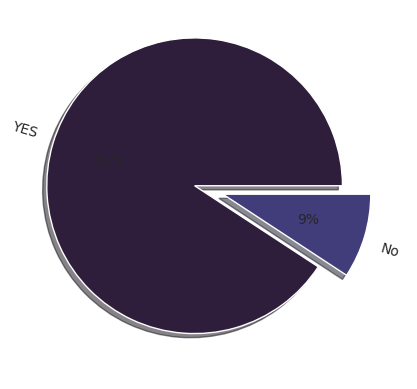

In [48]:
explode = [ 0.2, 0]
location = ['YES', 'No' ]

plt.pie(turbo_values, labels=location, colors=sns.color_palette('mako'),
        autopct='%.0f%%', explode=explode, shadow=True, rotatelabels='true')
plt.show()

#### Mileage

In [49]:
df.mileage

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: mileage, Length: 17869, dtype: int64

In [50]:
df.mileage.describe()

count    1.786900e+04
mean     1.642390e+06
std      5.022093e+07
min      0.000000e+00
25%      7.402900e+04
50%      1.300000e+05
75%      1.915760e+05
max      2.147484e+09
Name: mileage, dtype: float64

In [51]:
Mileage = df.mileage.value_counts().head(20)
Mileage

0         698
200000    180
150000    156
160000    118
180000    114
100000    100
1000       99
170000     98
120000     95
130000     81
111111     81
140000     73
190000     69
250000     66
300000     65
145000     62
240000     58
220000     58
90000      53
80000      53
Name: mileage, dtype: int64

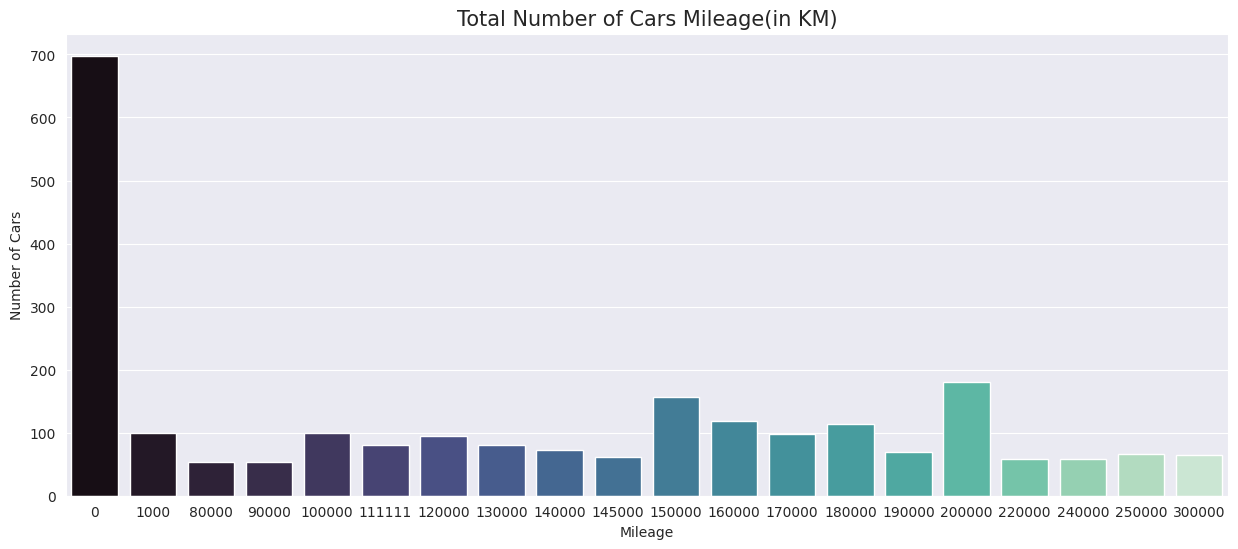

In [52]:
plt.figure(figsize=(15,6))
plt.title('Total Number of Cars Mileage(in KM)',fontsize=15)
c1=sns.barplot(x=Mileage.index,y=Mileage,palette="mako")
c1.set(xlabel='Mileage', ylabel='Number of Cars',)
plt.show()

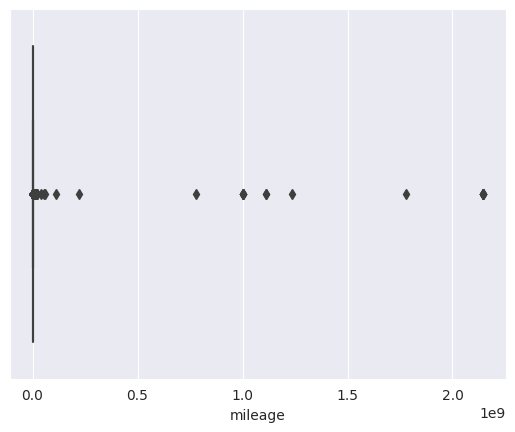

In [53]:
sns.boxplot(x = df.mileage)
plt.show()

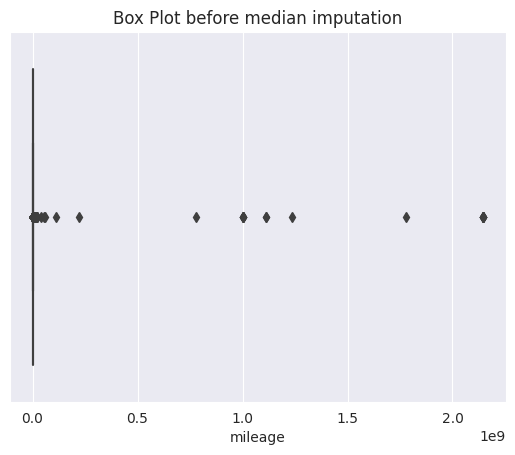

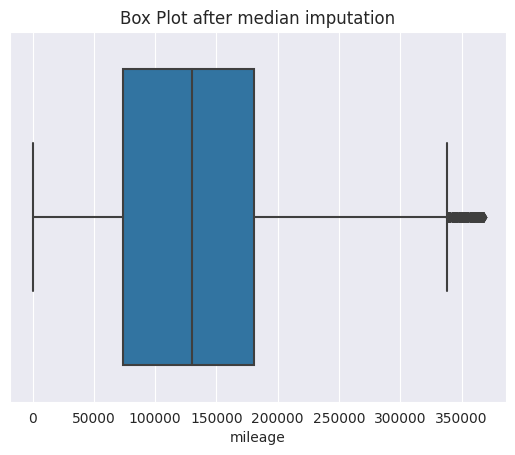

In [54]:
sns.boxplot(x=df['mileage'])
plt.title("Box Plot before median imputation")
plt.show()

mileage_outliers=find_outliers_IQR(df['mileage'])
med=df['mileage'].median()
df.loc[mileage_outliers.index,'mileage'] = med
            
sns.boxplot(x=df['mileage'])
plt.title("Box Plot after median imputation")
plt.show() 

In [55]:
df.drop(find_outliers_IQR(df['mileage']).index,inplace=True)

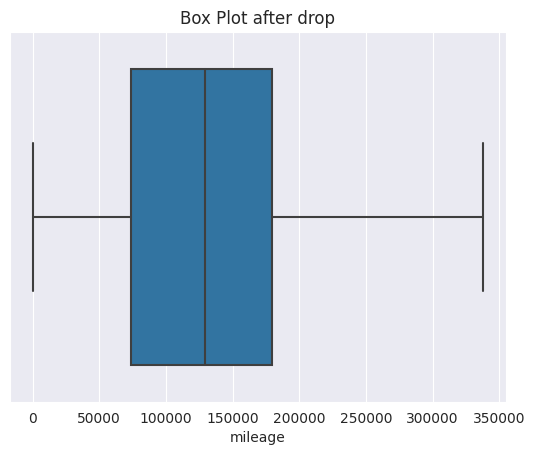

In [56]:
sns.boxplot(x=df['mileage'])
plt.title("Box Plot after drop")
plt.show()

#### Cylinders

In [57]:
df['cylinders']

0        6.0
1        6.0
2        4.0
3        4.0
4        4.0
        ... 
19232    4.0
19233    4.0
19234    4.0
19235    4.0
19236    4.0
Name: cylinders, Length: 17680, dtype: float64

In [58]:
df['cylinders'].value_counts()

4.0     13423
6.0      3072
8.0       788
5.0       164
3.0       107
2.0        42
1.0        34
12.0       29
10.0       10
16.0        5
7.0         4
9.0         1
14.0        1
Name: cylinders, dtype: int64

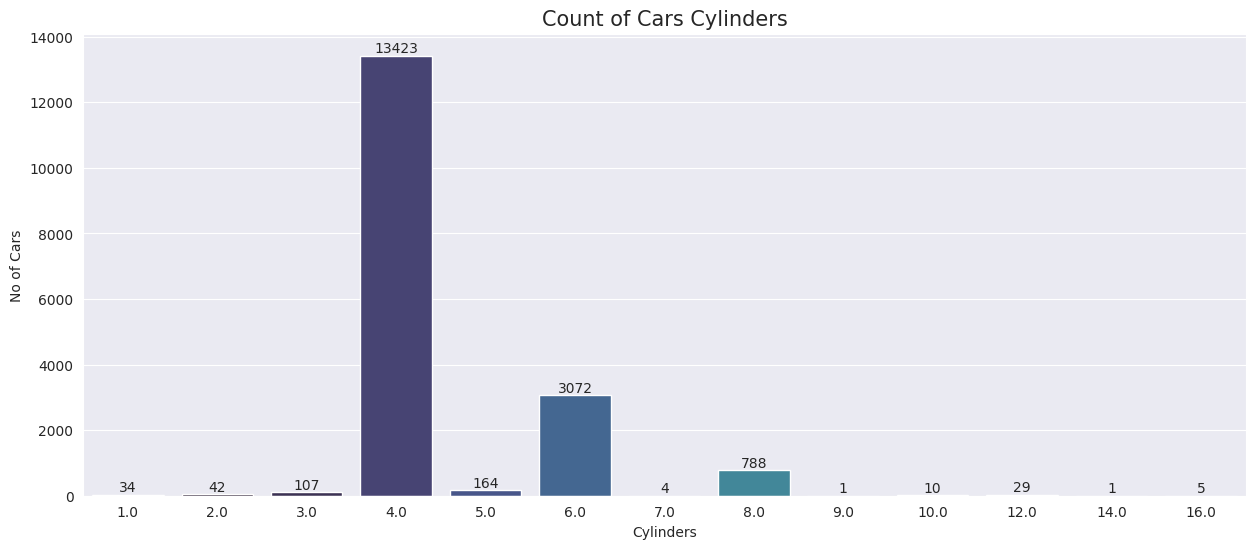

In [59]:
plt.figure(figsize=(15,6))
plt.title('Count of Cars Cylinders',fontsize=15)
c1=sns.countplot(x='cylinders',data=df,palette="mako")
c1.set(xlabel='Cylinders', ylabel='No of Cars')
c1.bar_label(c1.containers[0],size = 10)
plt.show()

* cllinders of 4 is the most frequency

#### Airbags

In [60]:
df['airbags']

0        12
1         8
2         2
3         0
4         4
         ..
19232     5
19233     8
19234     4
19235     4
19236    12
Name: airbags, Length: 17680, dtype: int64

In [61]:
df['airbags'].unique()

array([12,  8,  2,  0,  4,  6, 10,  3,  1, 16,  5,  7,  9, 11, 14, 15, 13])

In [62]:
df['airbags'].value_counts()

4     5196
12    5166
0     2233
8     1527
6     1247
2     1033
10     786
5      102
7       82
16      79
1       75
9       60
3       37
11      31
14      18
15       6
13       2
Name: airbags, dtype: int64

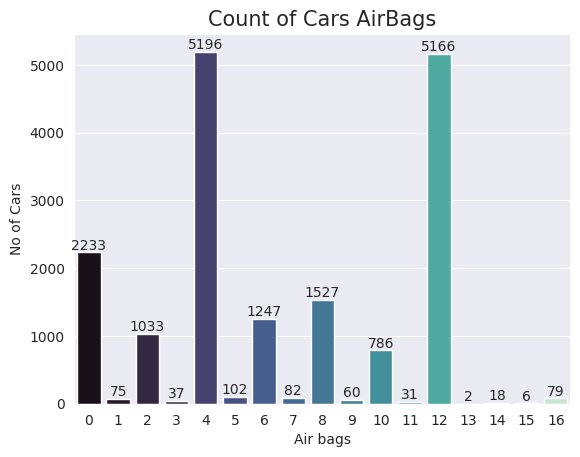

In [63]:
plt.title('Count of Cars AirBags',fontsize=15)
c1=sns.countplot(x='airbags',data=df,palette="mako")
c1.set(xlabel='Air bags', ylabel='No of Cars')
c1.bar_label(c1.containers[0],size = 10)
plt.show()

<AxesSubplot: >

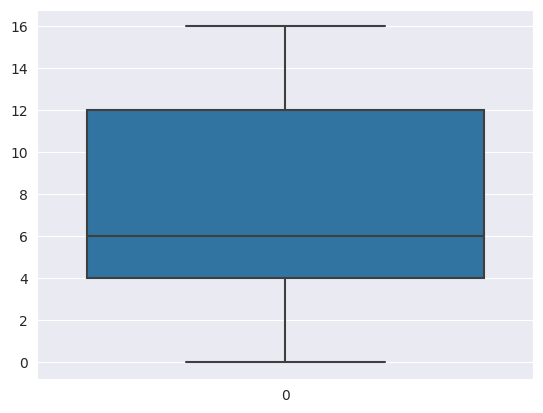

In [64]:
sns.boxplot(df['airbags'])

### Categorical Features

In [65]:

print("Categorical Variables:")
print(df.select_dtypes("object").columns.tolist())

Categorical Variables:
['manufacturer', 'model', 'category', 'leather_interior', 'fuel_type', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color']


#### manufacturer

In [66]:
df['manufacturer']

0                LEXUS
1            CHEVROLET
2                HONDA
3                 FORD
4                HONDA
             ...      
19232    MERCEDES-BENZ
19233          HYUNDAI
19234          HYUNDAI
19235        CHEVROLET
19236          HYUNDAI
Name: manufacturer, Length: 17680, dtype: object

In [67]:
df['manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'ISUZU',
       'JAGUAR', 'SKODA', 'DAIHATSU', 'BUICK', 'CADILLAC', 'PEUGEOT',
       'VOLVO', 'სხვა', 'HAVAL', 'SCION', 'UAZ', 'MERCURY', 'ZAZ',
       'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH', 'MASERATI', 'HUMMER',
       'SAAB', 'FERRARI', 'ROLLS-ROYCE', 'PONTIAC', 'SATURN', 'GREATWALL'],
      dtype=object)

In [68]:
Manufacture=df['manufacturer'].value_counts().head(20)

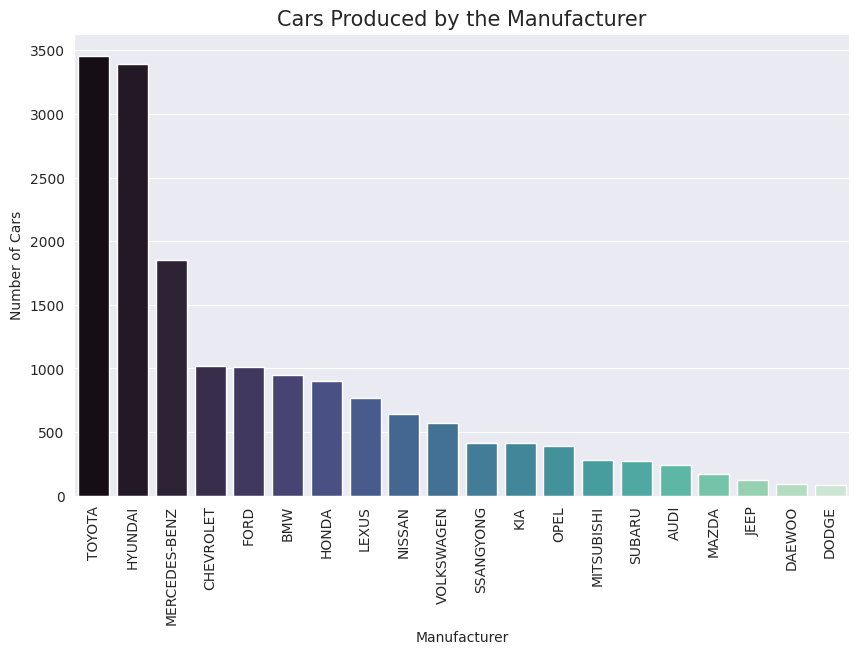

In [69]:
plt.figure(figsize=(10,6))
plt.tight_layout(pad=3)
plt.title("Cars Produced by the Manufacturer",fontsize=15)
sns.set_style("darkgrid")
a=sns.barplot(x=Manufacture.index,y=Manufacture,palette="mako")
a.set_xticklabels(Manufacture.index ,rotation=90)
a.set(xlabel='Manufacturer', ylabel='Number of Cars')
plt.show()

In [70]:
ax2= px.treemap(df,path=["manufacturer"],title="Popularity of the Popular Manufacturer:")
ax2.show()

#### Model

In [71]:
Model=df['model'].value_counts().head(20)
Model

Prius         1053
Sonata         975
Elantra        906
Camry          900
E 350          526
FIT            441
H1             414
Tucson         379
Santa FE       359
X5             323
Aqua           313
Cruze          294
Fusion         284
Optima         228
Transit        205
Jetta          201
Highlander     193
Actyon         188
ML 350         177
GX 460         171
Name: model, dtype: int64

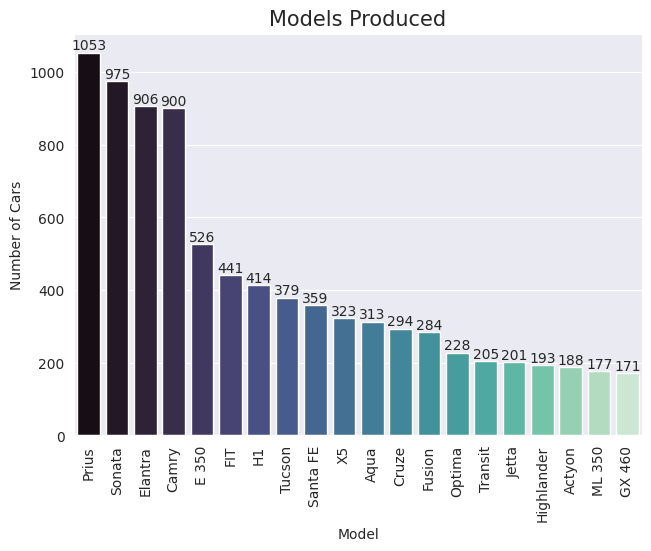

In [72]:
plt.title("Models Produced",fontsize=15)
plt.tight_layout(w_pad=15)
a=sns.barplot(x=Model.index,y=Model,palette="mako")
a.set_xticklabels(Model.index ,rotation=90)
a.set(xlabel='Model', ylabel='Number of Cars')
a.bar_label(a.containers[0],size = 10)
plt.show()

#### Category

In [73]:
df['category']

0             Jeep
1             Jeep
2        Hatchback
3             Jeep
4        Hatchback
           ...    
19232        Coupe
19233        Sedan
19234         Jeep
19235         Jeep
19236        Sedan
Name: category, Length: 17680, dtype: object

In [74]:
df['category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [75]:
Category=df['category'].value_counts()
Category

Sedan          8234
Jeep           4658
Hatchback      2773
Minivan         614
Coupe           475
Universal       338
Microbus        284
Goods wagon     224
Pickup           40
Cabriolet        29
Limousine        11
Name: category, dtype: int64

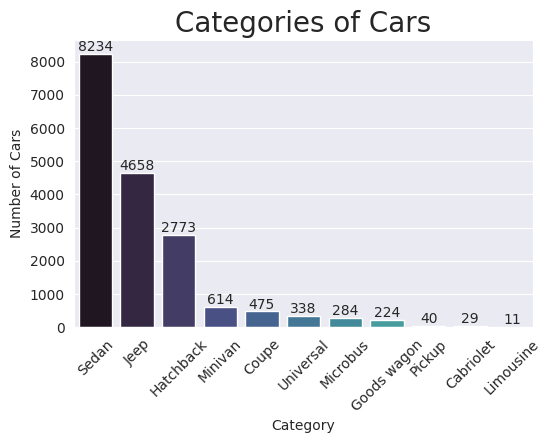

In [76]:
plt.title("Categories of Cars",fontsize=20)
plt.tight_layout(pad=5)
ax=sns.barplot(x=Category.index,y=Category,palette='mako')
ax.set_xticklabels(Category.index,rotation=45)
ax.set(xlabel='Category', ylabel='Number of Cars')
ax.bar_label(ax.containers[0])
plt.show()

#### Leather interior

In [77]:
df['leather_interior'].value_counts()

Yes    12572
No      5108
Name: leather_interior, dtype: int64

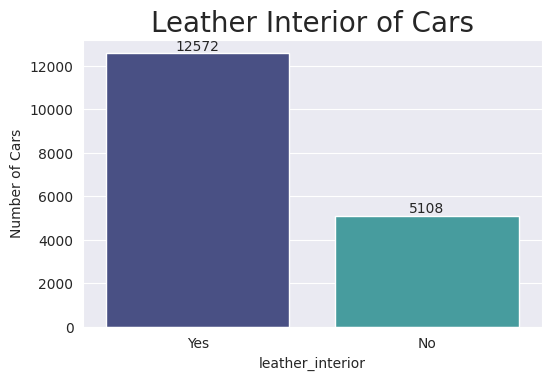

In [78]:
plt.title("Leather Interior of Cars",fontsize=20)
plt.tight_layout(pad=5)
ax=sns.countplot(data=df,x='leather_interior',palette='mako')
ax.set(ylabel='Number of Cars')
ax.bar_label(ax.containers[0])
plt.show()

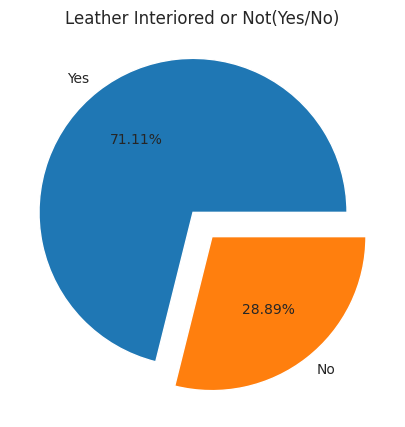

In [79]:
leather_Interior = ['Yes','No']
plt.figure(figsize=(6,5))
plt.title('Leather Interiored or Not(Yes/No)')
plt.pie(df['leather_interior'].value_counts(),autopct='%1.2f%%',labels = leather_Interior,explode=(0.1,0.1));
plt.show()

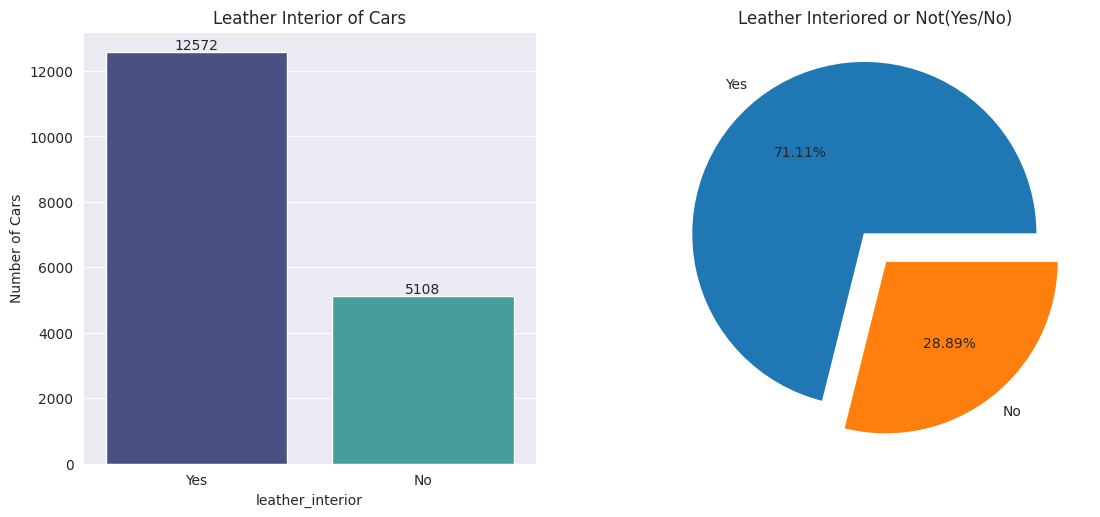

In [80]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

plt.tight_layout(pad=5)
ax=sns.countplot(data=df,x='leather_interior',palette='mako',ax=axes[0])
ax.set(ylabel='Number of Cars')
ax.bar_label(ax.containers[0])
ax.title.set_text('Leather Interior of Cars')

leather_Interior = ['Yes','No']
plt.title('Leather Interiored or Not(Yes/No)')
axes[1].pie(df['leather_interior'].value_counts(),autopct='%1.2f%%',labels = leather_Interior,explode=(0.1,0.1));
plt.show()

#### Fuel Type

In [81]:
fuel_type= df['fuel_type'].value_counts()
fuel_type

Petrol            9264
Diesel            3606
Hybrid            3425
LPG                843
CNG                459
Plug-in Hybrid      82
Hydrogen             1
Name: fuel_type, dtype: int64

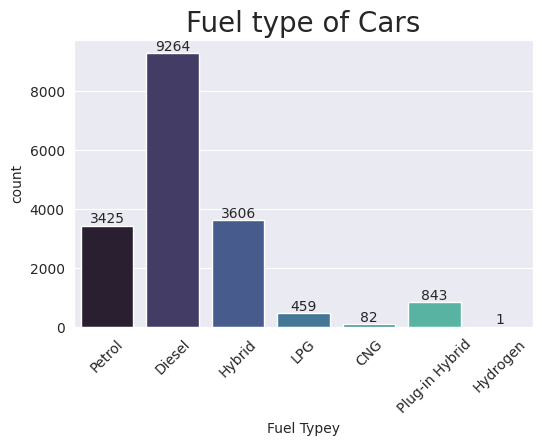

In [82]:
plt.title("Fuel type of Cars",fontsize=20)
plt.tight_layout(pad=5)
ax=sns.countplot(data=df,x='fuel_type',palette='mako')
ax.set(xlabel="Fuel Typey",label='Number of Cars')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(fuel_type.index,rotation=45)
plt.show()

In [83]:
df['drive_wheels'].value_counts()

Front    12051
4x4       3529
Rear      2100
Name: drive_wheels, dtype: int64

In [84]:
labels = df['drive_wheels'].unique().tolist()
sizes =  df['drive_wheels'].value_counts().tolist()
colors=['lightcyan','cyan','royalblue','darkblue']
colors = ['#66b3ff','#205bc0','#94b5ef']

fig = px.pie(df, values=sizes, names=labels, title='Percentage of the Types of Drive Wheels present in Cars',
             color_discrete_sequence=colors ,
             hole=.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(margin=dict( b=0, l=0, r=0))

fig.show()

#### Doors

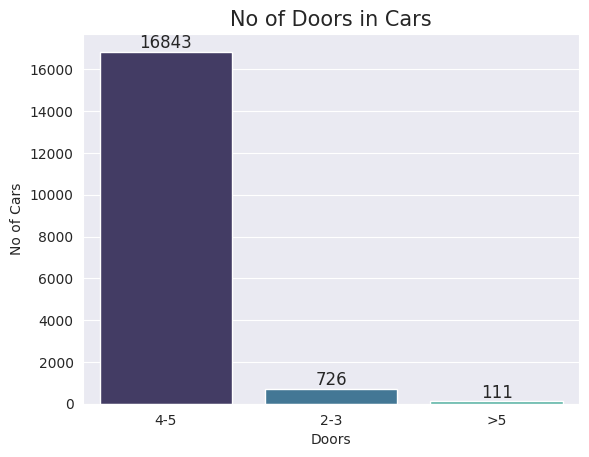

In [85]:
plt.title("No of Doors in Cars",fontsize=15)
doors = df['doors'].value_counts()
c1=sns.countplot(data=df,x='doors',palette="mako")
c1.set(xlabel='Doors',ylabel='No of Cars')
c1.bar_label(c1.containers[0],size = 12)
plt.show()

#### Wheels

In [86]:
df['wheel'].value_counts()

Left wheel          16231
Right-hand drive     1449
Name: wheel, dtype: int64

In [87]:
labels = df['wheel'].unique().tolist()
sizes =  df['wheel'].value_counts().tolist()
fig = px.pie(df, values=sizes, names=labels, title='Percentage of the Types of Wheels present in Cars',
color_discrete_sequence=px.colors.sequential.Blues_r)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(margin=dict( b=0, l=0, r=0))
fig.show()

#### Gear box type

In [88]:
df['gear_box_type'].value_counts()

Automatic    12440
Tiptronic     2727
Manual        1792
Variator       721
Name: gear_box_type, dtype: int64

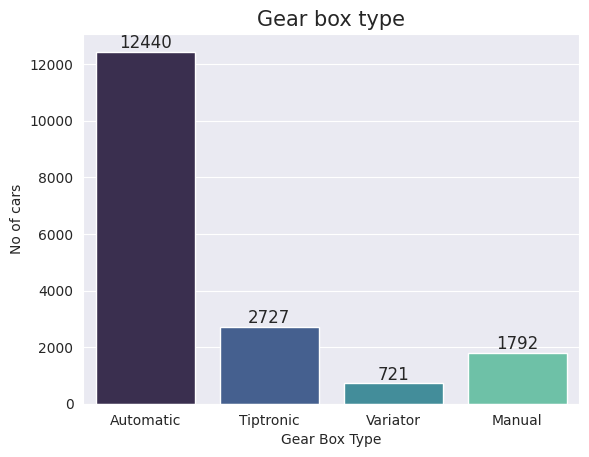

In [89]:
plt.title("Gear box type",fontsize=15)
c1=sns.countplot(x=df['gear_box_type'],palette="mako")
c1.bar_label(c1.containers[0],size = 12)
c1.set(xlabel="Gear Box Type",ylabel="No of cars")
plt.show()

* Most of the models have a Automatic kind of gear box.

## Multivariate Analysis

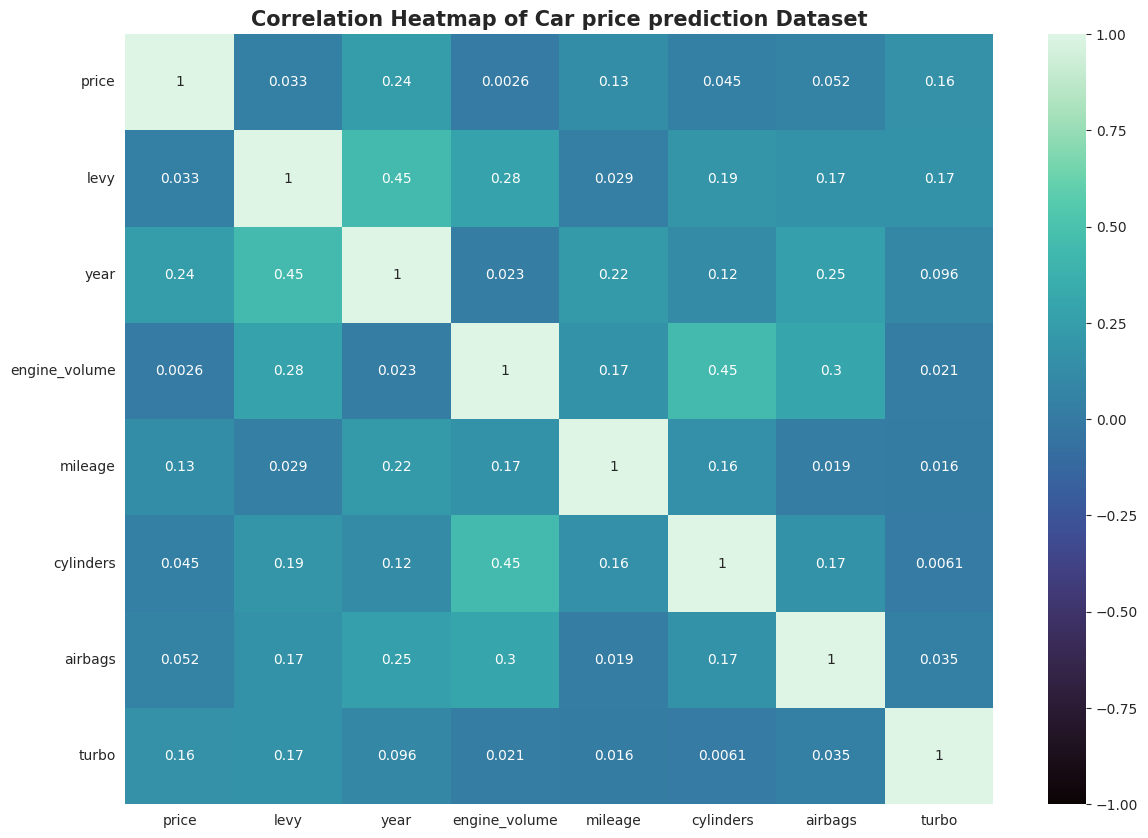

In [90]:
plt.figure(figsize=(14,10))
plot = sns.heatmap(abs(df.select_dtypes('number').corr()), annot=True, cmap='mako',vmin=-1)
plt.title('Correlation Heatmap of Car price prediction Dataset', weight='bold',fontsize=15)
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

* There is no strong correlation among the variables .

In [91]:
df[['price','cylinders']].corr()

,price,cylinders
price,1.000000,-0.044526
cylinders,-0.044526,1.000000


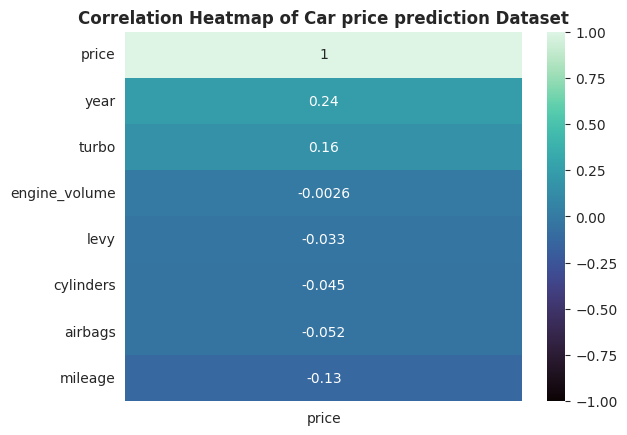

In [92]:
Target_corr  = df.select_dtypes('number').corr().loc[:, 'price'].to_frame().sort_values(by = 'price' , ascending=False)
plot = sns.heatmap(Target_corr, annot=True, cmap='mako', vmin = -1)
plt.title('Correlation Heatmap of Car price prediction Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

In [93]:
df.groupby('manufacturer')['mileage'].max().sort_values(ascending=False)

manufacturer
HYUNDAI      338110
FORD         338000
TOYOTA       337600
LEXUS        336000
SUZUKI       336000
              ...  
SATURN       100000
GREATWALL     77666
LANCIA        57000
MASERATI      50314
HAVAL         28000
Name: mileage, Length: 61, dtype: int64

In [94]:
df.groupby('model')['mileage'].max().sort_values(ascending=False)

model
Sonata              338110
Taurus              338000
Prius               337600
Grand Vitara        336000
GX 470              336000
                     ...  
735                      0
Quattroporte             0
Sprinter 308 CDI         0
335 ტურბო                0
Civic Ferio              0
Name: mileage, Length: 1490, dtype: int64

### Year wise variety of Cars:

In [95]:
df_wise_year = df.groupby(by= ['year'], as_index=False).count().sort_values(by='year', ascending=False)[['year','price']]
df_wise_year = df_wise_year.rename(columns={'price': 'count'})
df_wise_year['prd_yr_per'] = round(df_wise_year['count']/sum(df_wise_year['count'])*100,2)
df_wise_year

,year,count,prd_yr_per
51,2020,22,0.12
50,2019,232,1.31
49,2018,346,1.96
48,2017,778,4.40
47,2016,1241,7.02
46,2015,1373,7.77
45,2014,1981,11.20
44,2013,1814,10.26
43,2012,2033,11.50
42,2011,1550,8.77


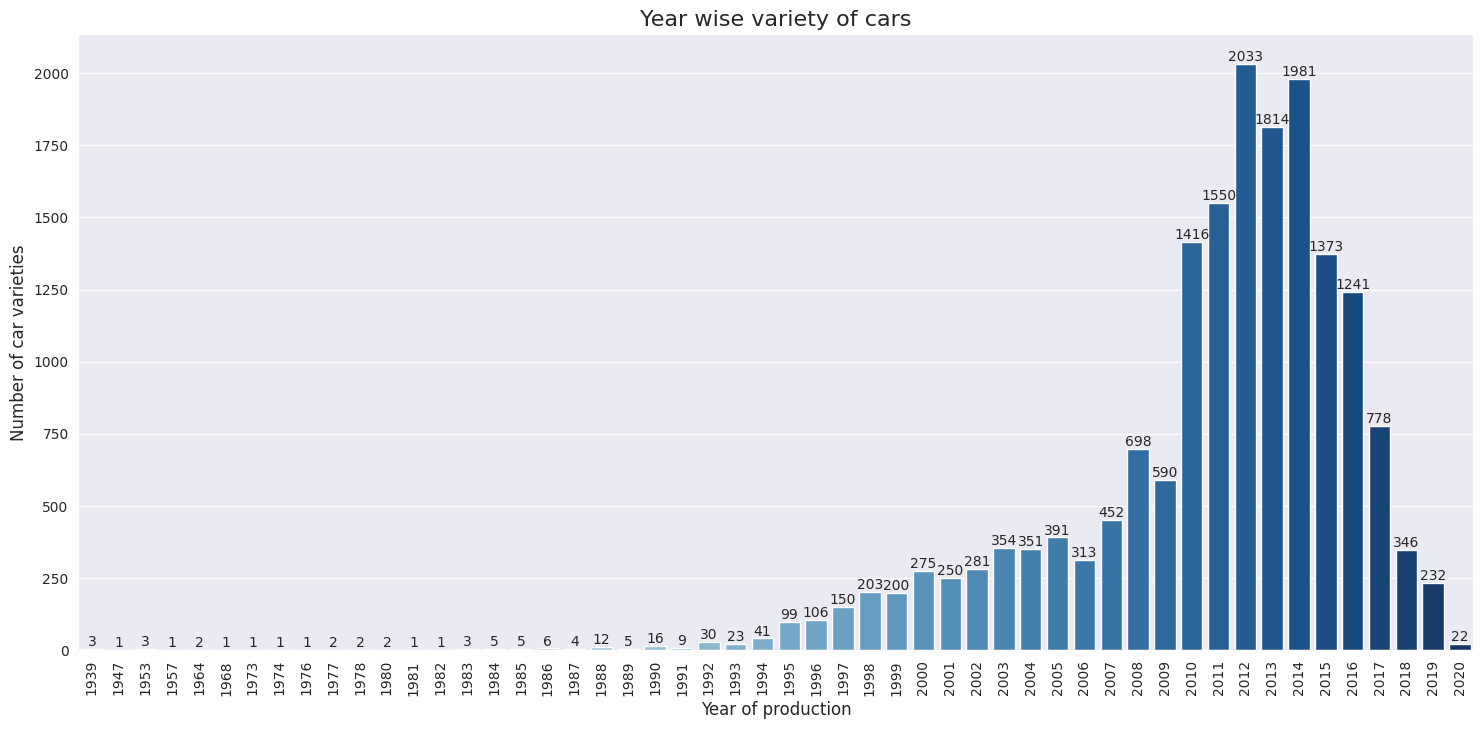

In [96]:
plt.figure(figsize=(18,8))
plot = sns.barplot(x = 'year', y = 'count',  data = df_wise_year,palette="Blues")
plt.title('Year wise variety of cars', fontsize=16)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plot.bar_label(container=plot.containers[0])
plt.xlabel('Year of production', fontsize=12)
plt.ylabel('Number of car varieties', fontsize=12)

plt.show()

* The quantity of car variants each year gradualy increases upto 2015 after which we get to witness a decline.

### Manufacturer's variety of cars:

In [97]:
df_wise_manu = df.groupby(by= ['manufacturer'], as_index=False).count().sort_values(by='price', ascending=False)[['manufacturer','price']]
df_wise_manu = df_wise_manu.rename(columns={'price': 'count'})
df_wise_manu

,manufacturer,count
54,TOYOTA,3457
21,HYUNDAI,3390
33,MERCEDES-BENZ,1852
6,CHEVROLET,1017
14,FORD,1015
...,...,...
18,HAVAL,1
17,GREATWALL,1
12,FERRARI,1
41,PONTIAC,1


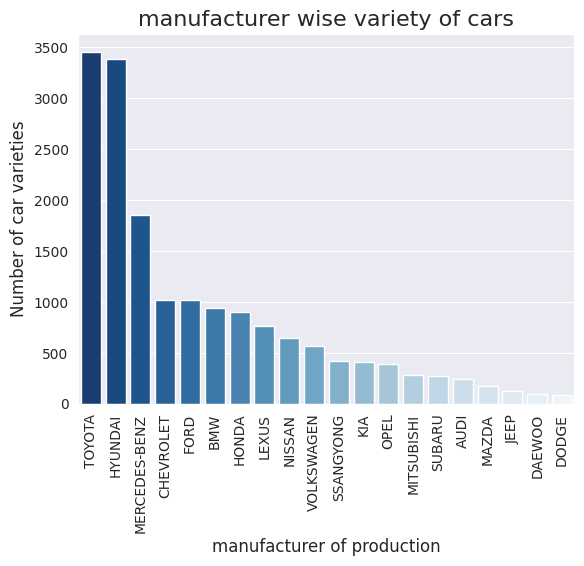

In [98]:
plot = sns.barplot(x = 'manufacturer', y = 'count',  data = df_wise_manu.head(20),palette="Blues_r")
plt.title('manufacturer wise variety of cars', fontsize=16)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.xlabel('manufacturer of production', fontsize=12)
plt.ylabel('Number of car varieties', fontsize=12)
plt.show()

* Hyundai , Toyota and Mercedes-Benz have the highest variants of cars.

### Mean Price wise analysis of each feature

In [99]:
lcv=df.select_dtypes('object')
for column in lcv:
    print(column)
    print(df[['price', column]].groupby(by= [column], as_index=False).agg('mean').sort_values(by='price', ascending=False))

manufacturer
   manufacturer         price
12      FERRARI  31988.000000
51    SSANGYONG  24892.081731
31     MASERATI  20149.500000
28   LAND ROVER  19679.923077
22     INFINITI  17992.307692
..          ...           ...
56          VAZ   4727.108696
37     MOSKVICH   4609.000000
59          ZAZ   3822.500000
45        ROVER   2433.333333
44  ROLLS-ROYCE    178.500000

[61 rows x 2 columns]
model
                       model    price
1293            Sprinter VAN  42651.0
1177  Range Rover Evoque 2.0  42337.0
94                 328 sulev  42337.0
550                E 220 cdi  42337.0
1128               Q5 S-line  42337.0
...                      ...      ...
821                 IX35 2.0    100.0
1310                TL saber     69.0
1295       Sprinter სატვირთო     50.0
958               Mark X Zio     35.0
1220                     Sai     34.0

[1490 rows x 2 columns]
category
       category         price
7       Minivan  19304.022801
10    Universal  17050.301775
8        Pickup  1

In [100]:
lcv.drop(columns=['manufacturer','model'],inplace=True)

In [101]:
def annot_percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()*1.015
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

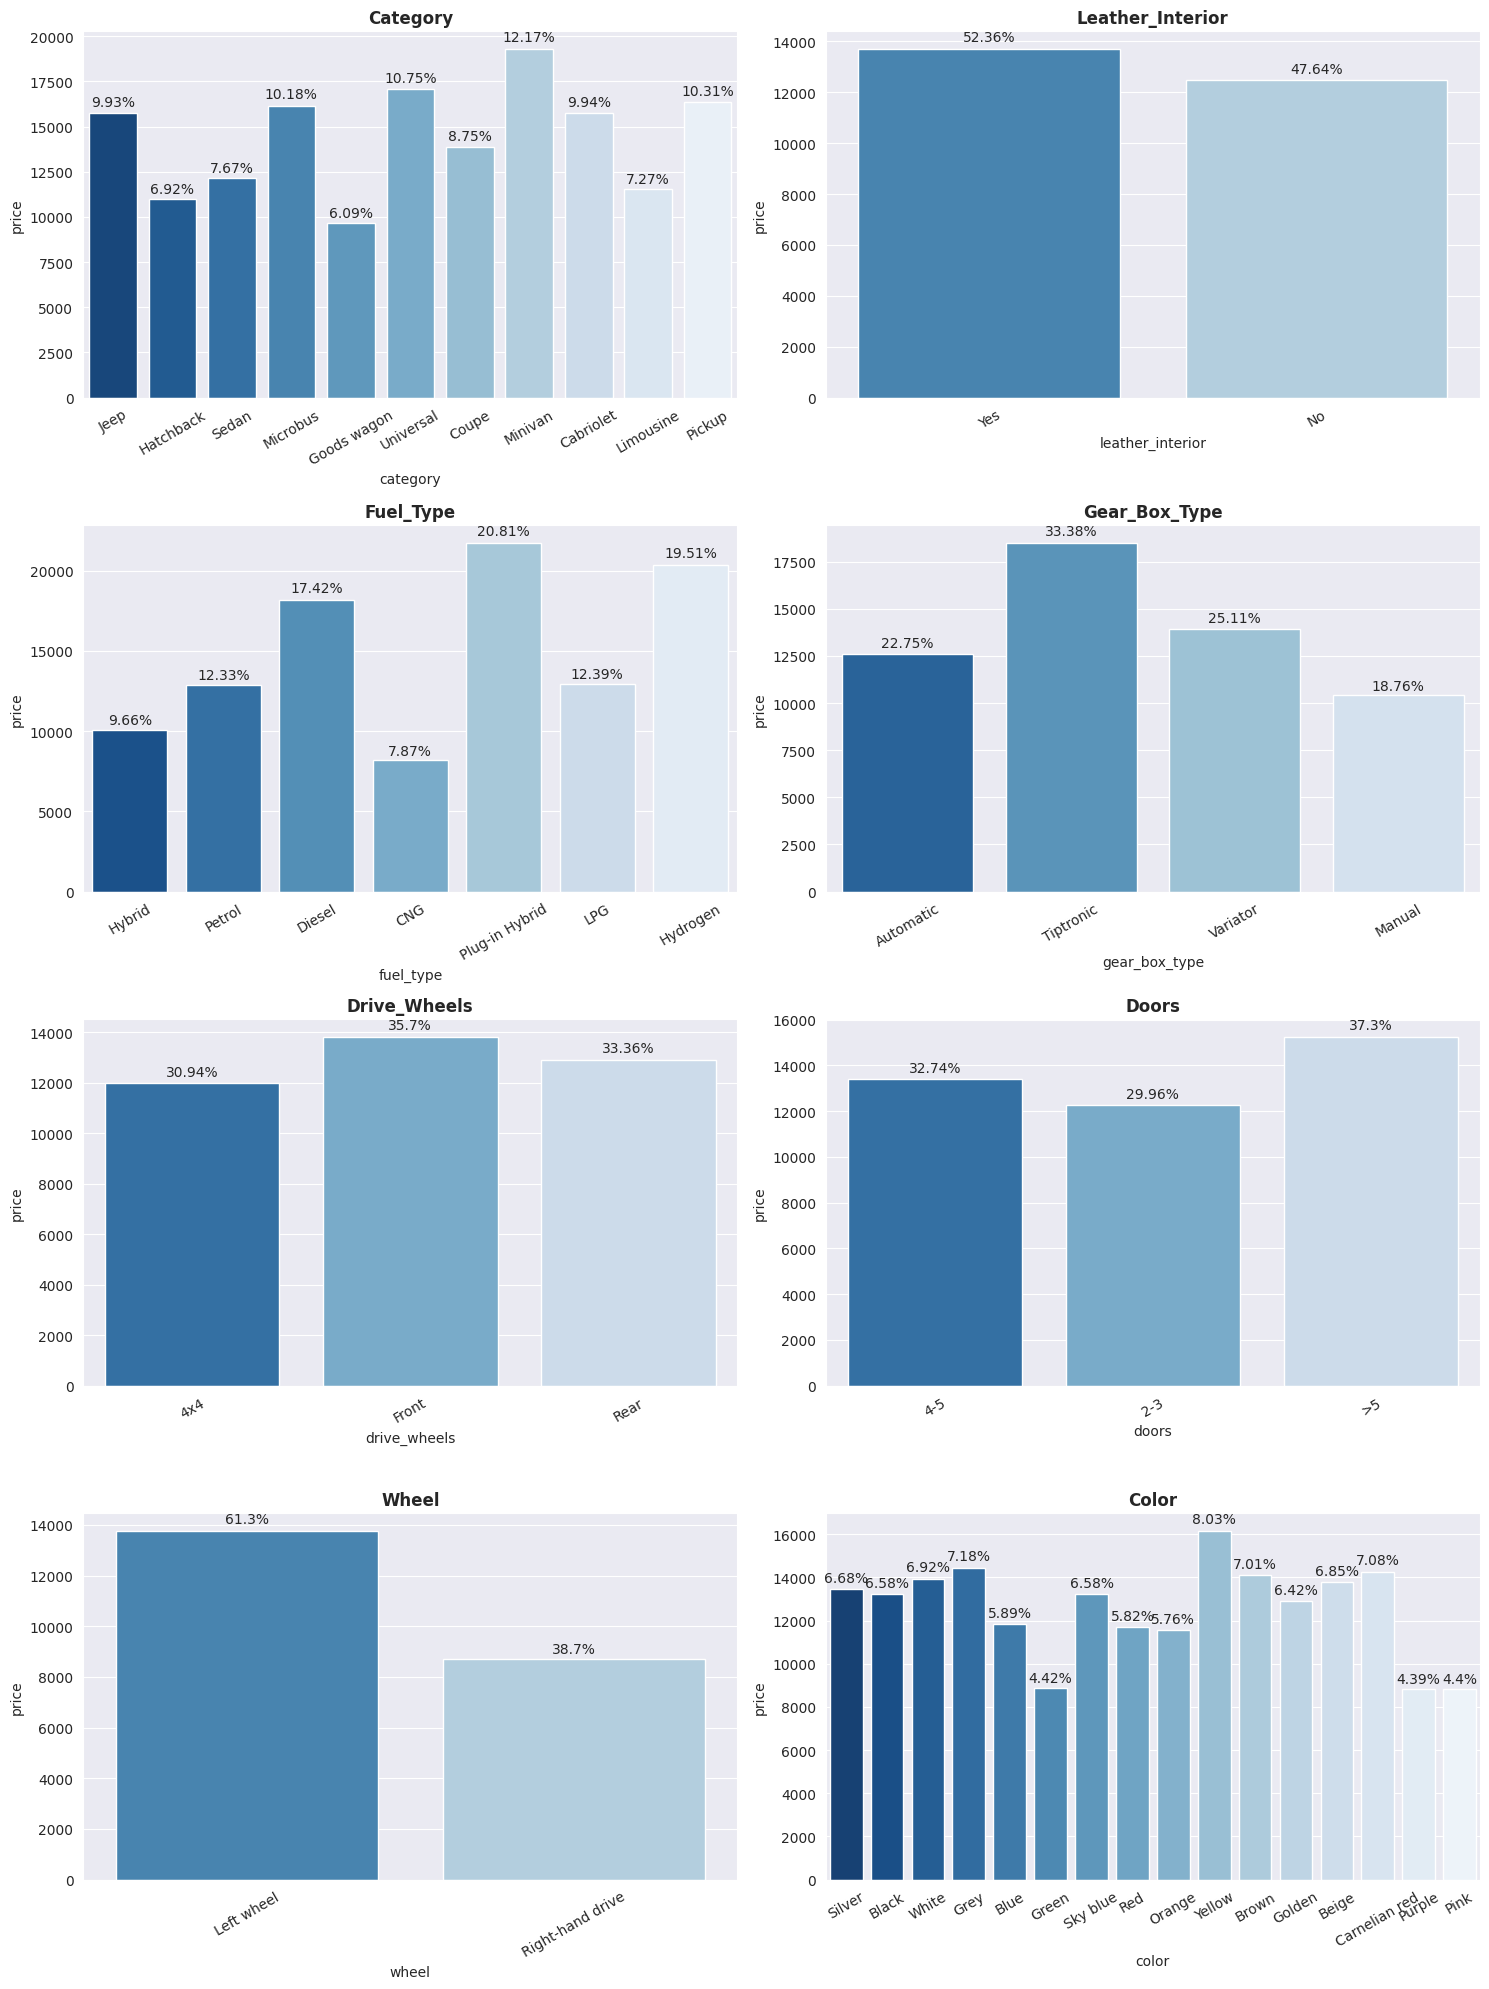

In [102]:
plt.figure(figsize=(15,20))
for n,column in  enumerate(lcv):
    plot=plt.subplot(4,2,n+1)
    c1=sns.barplot(x =df[column], y= df['price'],palette="Blues_r",errorbar=None)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
    # Add annotations to the bar plot
    annot_percent(plot)

* The average price of Diesel car is maximum and CNG is the minimum.
* The average price of 4x4,Front and Rear drives wheels are almost similar.
* 2-3 Doors has the highest average maximum price.
* Left wheel drive has the maximum average price.

In [103]:
df_price_wise_manu=df[['price', 'manufacturer']].groupby(by= 'manufacturer', as_index=False).agg('mean').sort_values(by='price', ascending=False)
df_price_wise_manu

,manufacturer,price
12,FERRARI,31988.000000
51,SSANGYONG,24892.081731
31,MASERATI,20149.500000
28,LAND ROVER,19679.923077
22,INFINITI,17992.307692
...,...,...
56,VAZ,4727.108696
37,MOSKVICH,4609.000000
59,ZAZ,3822.500000
45,ROVER,2433.333333


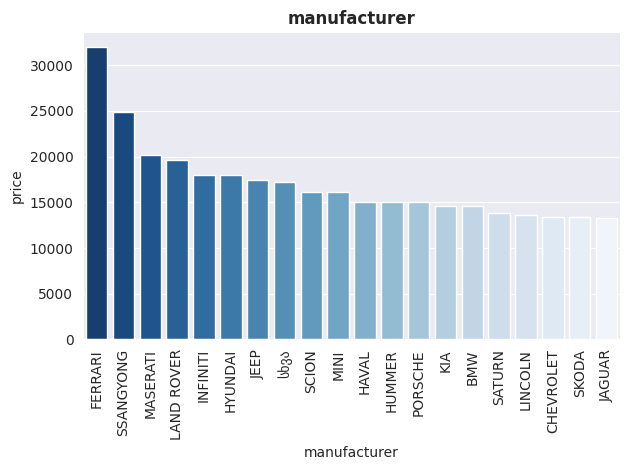

In [104]:
c1=sns.barplot(data=df_price_wise_manu.head(20),x ='manufacturer', y= 'price',palette="Blues_r")
c1.set_xticklabels(c1.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title('manufacturer',weight='bold')
plt.tight_layout()

In [105]:
df_price_wise_model=df[['price', 'model']].groupby(by= 'model', as_index=False).agg('mean').sort_values(by='price', ascending=False)
df_price_wise_model

,model,price
1293,Sprinter VAN,42651.0
1177,Range Rover Evoque 2.0,42337.0
94,328 sulev,42337.0
550,E 220 cdi,42337.0
1128,Q5 S-line,42337.0
...,...,...
821,IX35 2.0,100.0
1310,TL saber,69.0
1295,Sprinter სატვირთო,50.0
958,Mark X Zio,35.0


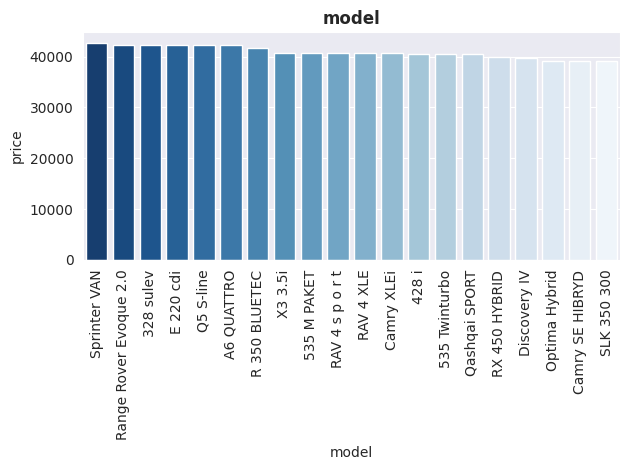

In [106]:
c1=sns.barplot(data=df_price_wise_model.head(20),x ='model', y= 'price',palette="Blues_r")
c1.set_xticklabels(c1.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title('model',weight='bold')
plt.tight_layout()

### Average Production Price for each year:

In [107]:
price_wise_years=df.groupby('year')['price'].agg('mean').sort_values(ascending=False).to_frame()
price_wise_years.head(10)

,price
year,
1982,31361.000000
2016,19355.463336
2017,16310.713368
1973,15681.000000
2018,15648.144509
2014,15099.096416
2020,14949.136364
2015,14745.121631
2013,14312.902426


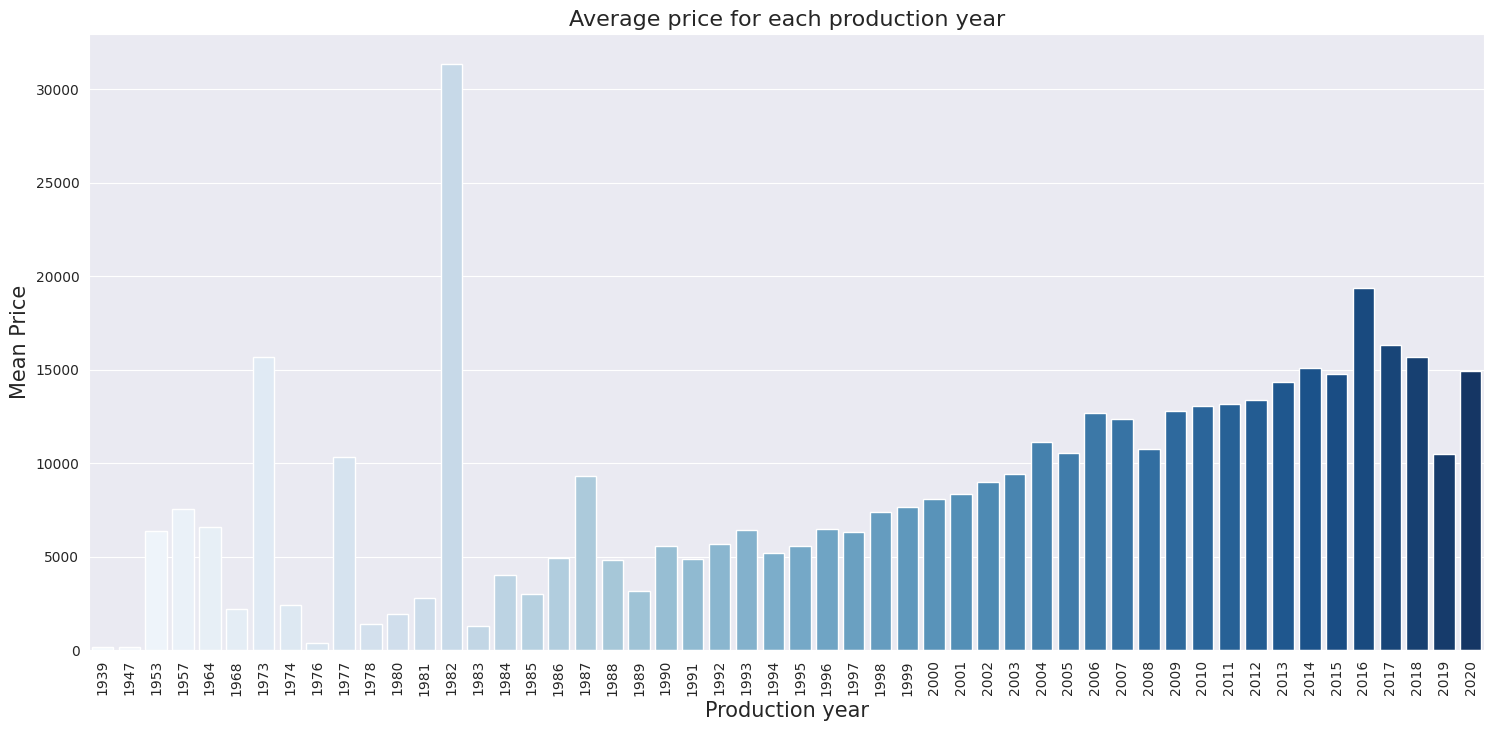

In [108]:
plt.figure(figsize=(18,8))
plot = sns.barplot(x="year", y="price", data=df,palette="Blues",errorbar=None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title('Average price for each production year', fontsize=16)
plt.xlabel('Production year', fontsize=15)
plt.ylabel('Mean Price', fontsize=15)
plt.show()

In [109]:
px.bar(data_frame=df,x='year',y='price')


*  From the given plot we can infer that there seems to be general increase in the average price of the car each year.







<AxesSubplot: xlabel='year', ylabel='price'>

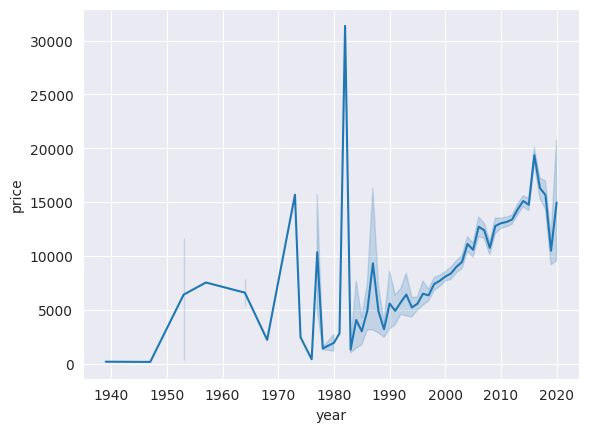

In [110]:
# px.line(data_frame=df,x='year',y='price')
sns.lineplot(data=df,x='year', y= 'price')


### Comparison of year wise mean price and individual features

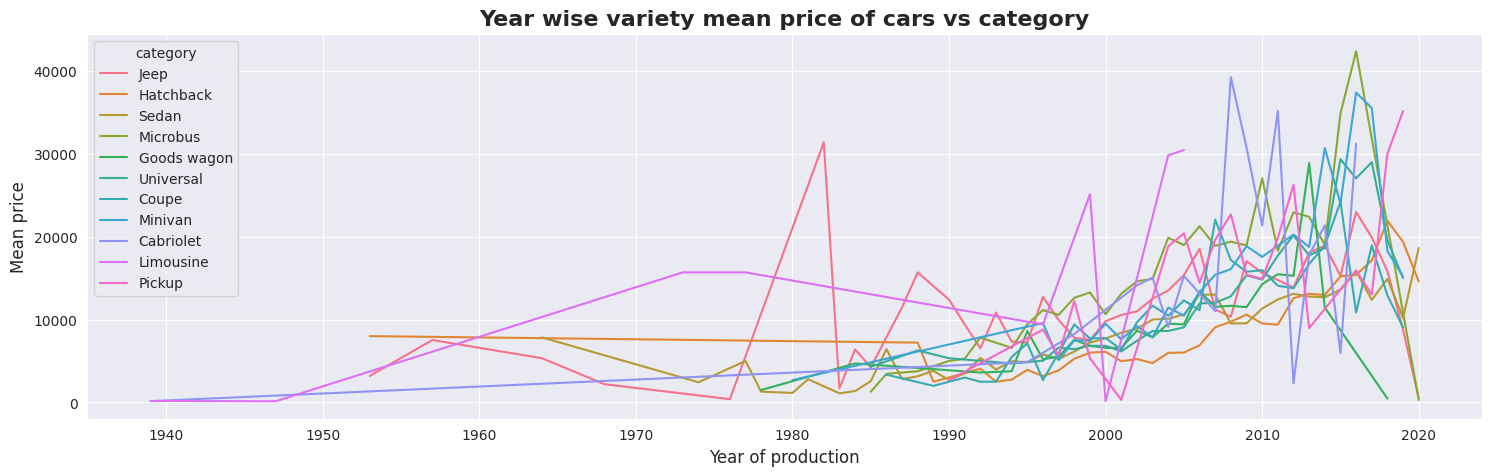

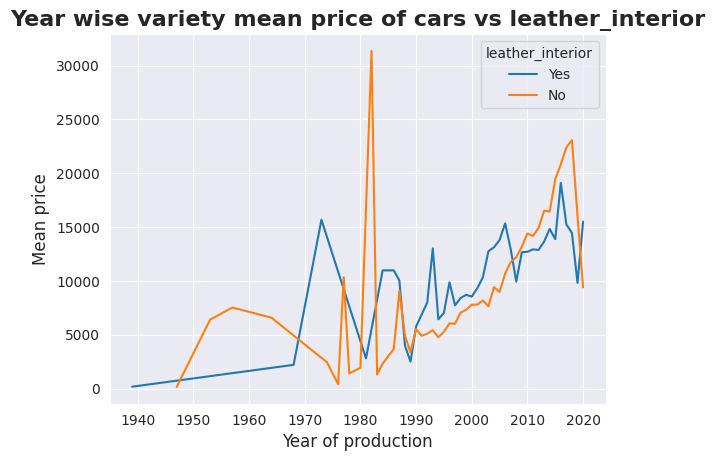

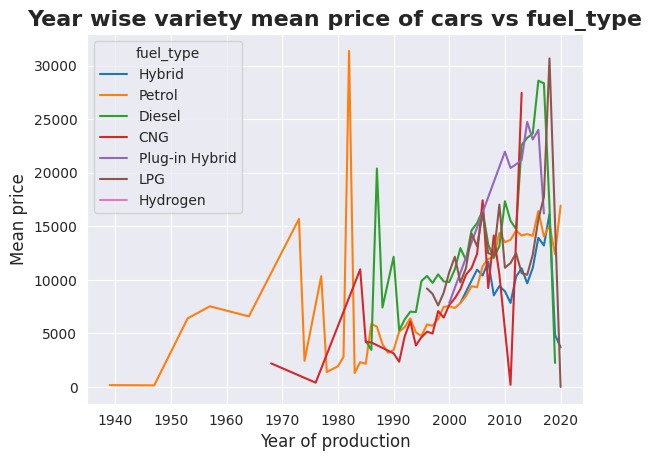

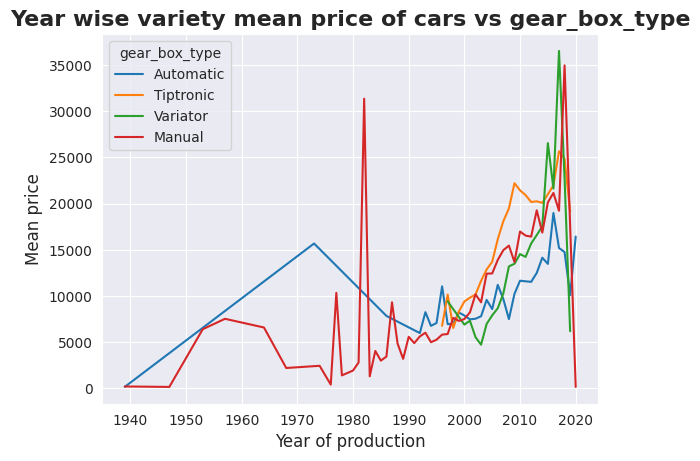

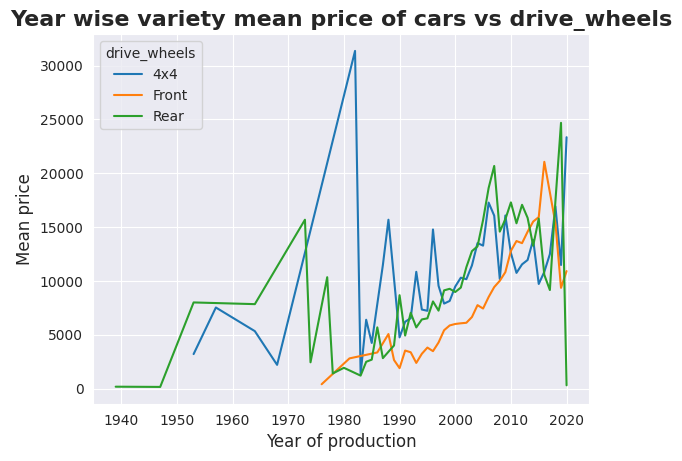

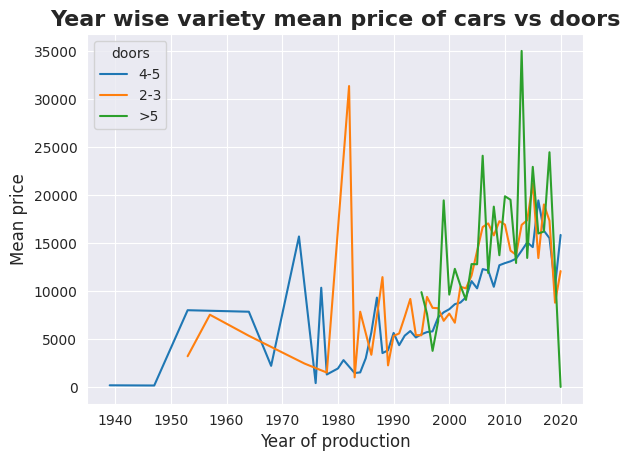

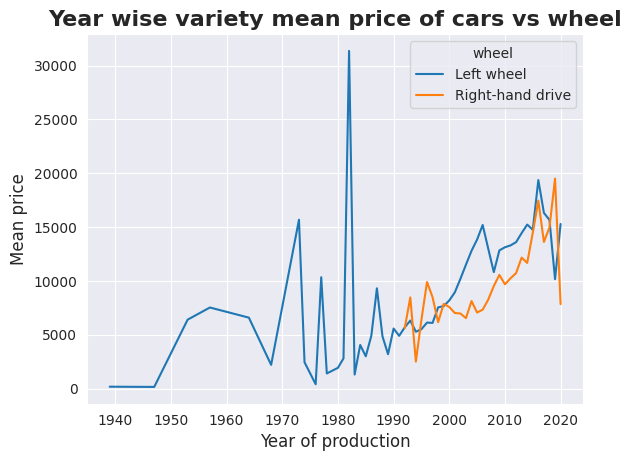

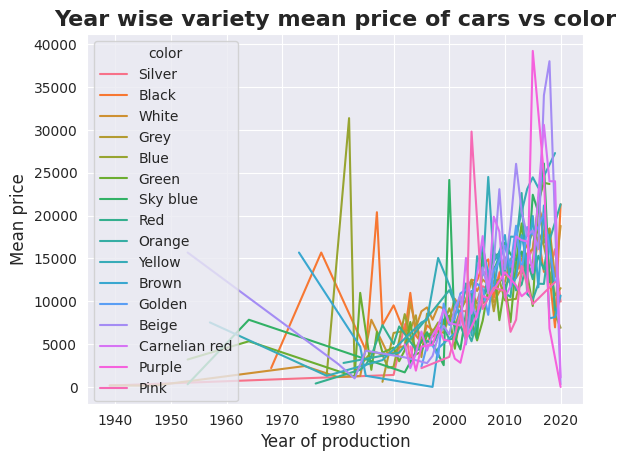

In [111]:
plt.figure(figsize=(18,5))
for n,column in  enumerate(lcv):
    sns.lineplot(data=df,x='year', y= 'price',hue=column,errorbar=None)
    plt.title(f'Year wise variety mean price of cars vs {column}', fontsize=16,weight='bold')
    plt.xlabel('Year of production', fontsize=12)
    plt.ylabel('Mean price', fontsize=12)    
    plt.show()

#### From the above plots we can infer that:

* The average price of tiptronic engines have risen due to a surge in demand over the last few years.

* Leather interior's average price is always high.
* There is also an increase in the average price of diesel engines.

In [112]:
df.columns

Index(['price', 'levy', 'manufacturer', 'model', 'year', 'category',
       'leather_interior', 'fuel_type', 'engine_volume', 'mileage',
       'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color',
       'airbags', 'turbo'],
      dtype='object')

## Feature Engineering


In [113]:
df_encoding=df.copy()

In [114]:
df_encoding.shape

(17680, 18)

In [115]:
targetEncod = ce.LeaveOneOutEncoder()
ordinalEncoder = OrdinalEncoder()
hotEncoder = OneHotEncoder(sparse_output=False,drop='first')


*  Iam using a OneHotLeaveTargetEncoder for catgory feature that have aunique values more than 15 item
*   for less than 15 item  I provide a two ways OrdinalEncoder and OneHotEncoder 


*   Ordinal Encoder Given Me A Accuracy better than oneHotEncoder
*   but i leave my example for oneHotEncoder for anyone want it 













In [116]:
df.groupby('manufacturer').mean()['price']

/tmp/ipykernel_20/1405838731.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



manufacturer
ACURA          5910.933333
ALFA ROMEO     9890.250000
AUDI          10701.701245
BMW           14599.724868
BUICK         11074.375000
                  ...     
VAZ            4727.108696
VOLKSWAGEN    11338.568662
VOLVO         10611.588235
ZAZ            3822.500000
სხვა          17248.500000
Name: price, Length: 61, dtype: float64

### manufacturer

In [117]:
df_encoding['manufacturer']=targetEncod.fit_transform(df['manufacturer'],df['price'])
df_encoding

,price,levy,manufacturer,model,year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,turbo
0,13328,1399,10236.028758,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12,0
1,16621,1018,13436.010827,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8,0
2,8467,0,10696.590000,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2,0
3,3607,862,12087.852071,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0,0
4,11726,446,10692.968889,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,12239.072393,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2-3,Left wheel,Silver,5,1
19233,15681,831,17944.342874,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left wheel,Red,8,0
19234,26108,836,17941.266155,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4-5,Left wheel,Grey,4,0
19235,5331,1288,13447.123031,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,4-5,Left wheel,Black,4,0


### Model

In [118]:
df_encoding['model'] = targetEncod.fit_transform(df['model'],df['price'])

In [119]:
df_encoding.head()

,price,levy,manufacturer,model,year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,turbo
0,13328,1399,10236.028758,6814.748344,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12,0
1,16621,1018,13436.010827,7362.777778,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8,0
2,8467,0,10696.590000,10708.893182,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2,0
3,3607,862,12087.852071,8501.194245,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0,0
4,11726,446,10692.968889,10701.486364,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4,0


### category

In [120]:
df_encoding['category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [121]:
## Ordinal Encoder
category_encoded = ordinalEncoder.fit_transform(df_encoding[['category']])
category_encoded
df_encoding['category']=category_encoded 


> OneHot Encoder





In [122]:
# category_df = pd.DataFrame(category_encoded, columns=hotEncoder.categories_[0].tolist()[1:],index=df_encoding['category'].index)
# category_df.head()

In [123]:
# df_encoding=pd.concat([df_encoding.drop('category', axis=1), category_df], axis=1)
# df_encoding.head() 

### leather_interior,doors

In [124]:
df_encoding['leather_interior'] = df['leather_interior'].map({"Yes":1,"No" : 0})
df_encoding['doors'] = df['doors'].map({'4-5':4, '2-3':2, '>5':5})
df_encoding.head()

,price,levy,manufacturer,model,year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,turbo
0,13328,1399,10236.028758,6814.748344,2010,4.0,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621,1018,13436.010827,7362.777778,2011,4.0,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,8467,0,10696.590000,10708.893182,2006,3.0,0,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,3607,862,12087.852071,8501.194245,2011,4.0,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726,446,10692.968889,10701.486364,2014,3.0,1,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0


### fuel_type

In [125]:
df['fuel_type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

In [126]:
fuel_type_encoded = ordinalEncoder.fit_transform(df[['fuel_type']])
fuel_type_encoded
df_encoding['fuel_type']=fuel_type_encoded



> OneHot Encoder



In [127]:
# fuel_type_df = pd.DataFrame(fuel_type_encoded, columns=hotEncoder.categories_[0].tolist()[1:],index=df_encoding['fuel_type'].index)
# fuel_type_df.head()

In [128]:
# df_encoding=pd.concat([df_encoding.drop('fuel_type', axis=1), fuel_type_df], axis=1)
# df_encoding.head()

### gear_box_type

In [129]:
df['gear_box_type'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

In [130]:
gear_box_type_encoded = ordinalEncoder.fit_transform(df[['gear_box_type']])
df_encoding['gear_box_type']=gear_box_type_encoded 



> OneHot Encoder





In [131]:
# gear_box_type_encoded = hotEncoder.fit_transform(df[['gear_box_type']])
# gear_box_type_df = pd.DataFrame(gear_box_type_encoded, columns=hotEncoder.categories_[0].tolist()[1:],index=df_encoding['gear_box_type'].index)
# gear_box_type_df.head()

In [132]:
# df_encoding=pd.concat([df_encoding.drop('gear_box_type', axis=1), gear_box_type_df], axis=1)
# df_encoding.head()

In [133]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17680 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             17680 non-null  int64  
 1   levy              17680 non-null  int64  
 2   manufacturer      17680 non-null  float64
 3   model             17680 non-null  float64
 4   year              17680 non-null  int64  
 5   category          17680 non-null  float64
 6   leather_interior  17680 non-null  int64  
 7   fuel_type         17680 non-null  float64
 8   engine_volume     17680 non-null  float64
 9   mileage           17680 non-null  int64  
 10  cylinders         17680 non-null  float64
 11  gear_box_type     17680 non-null  float64
 12  drive_wheels      17680 non-null  object 
 13  doors             17680 non-null  int64  
 14  wheel             17680 non-null  object 
 15  color             17680 non-null  object 
 16  airbags           17680 non-null  int64 

### drive_wheels

In [134]:
df['drive_wheels'].value_counts()

Front    12051
4x4       3529
Rear      2100
Name: drive_wheels, dtype: int64

In [135]:
drive_wheels_encoded = ordinalEncoder.fit_transform(df[['drive_wheels']])
df_encoding['drive_wheels']=drive_wheels_encoded



> OneHot Encoder



In [136]:
# drive_wheels_encoded = hotEncoder.fit_transform(df[['drive_wheels']])
# drive_wheels_df = pd.DataFrame(drive_wheels_encoded, columns=hotEncoder.categories_[0].tolist()[1:],index=df['drive_wheels'].index)
# drive_wheels_df.head()

In [137]:
# df_encoding=pd.concat([df_encoding.drop('drive_wheels', axis=1), drive_wheels_df], axis=1)
# df_encoding.head()

### wheel

In [138]:
df['wheel'].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

In [139]:
df_encoding['wheel'] = df['wheel'].map({"Left wheel":0,"Right-hand drive" : 1})
df_encoding.head()

,price,levy,manufacturer,model,year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,turbo
0,13328,1399,10236.028758,6814.748344,2010,4.0,1,2.0,3.5,186005,6.0,0.0,0.0,4,0,Silver,12,0
1,16621,1018,13436.010827,7362.777778,2011,4.0,0,5.0,3.0,192000,6.0,2.0,0.0,4,0,Black,8,0
2,8467,0,10696.590000,10708.893182,2006,3.0,0,5.0,1.3,200000,4.0,3.0,1.0,4,1,Black,2,0
3,3607,862,12087.852071,8501.194245,2011,4.0,1,2.0,2.5,168966,4.0,0.0,0.0,4,0,White,0,0
4,11726,446,10692.968889,10701.486364,2014,3.0,1,5.0,1.3,91901,4.0,0.0,1.0,4,0,Silver,4,0


In [140]:
df_encoding.head()

,price,levy,manufacturer,model,year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,turbo
0,13328,1399,10236.028758,6814.748344,2010,4.0,1,2.0,3.5,186005,6.0,0.0,0.0,4,0,Silver,12,0
1,16621,1018,13436.010827,7362.777778,2011,4.0,0,5.0,3.0,192000,6.0,2.0,0.0,4,0,Black,8,0
2,8467,0,10696.590000,10708.893182,2006,3.0,0,5.0,1.3,200000,4.0,3.0,1.0,4,1,Black,2,0
3,3607,862,12087.852071,8501.194245,2011,4.0,1,2.0,2.5,168966,4.0,0.0,0.0,4,0,White,0,0
4,11726,446,10692.968889,10701.486364,2014,3.0,1,5.0,1.3,91901,4.0,0.0,1.0,4,0,Silver,4,0


### color

In [141]:
df_encoding.drop(['color'],axis=1,inplace=True)
df_encoding.head(5)

,price,levy,manufacturer,model,year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,airbags,turbo
0,13328,1399,10236.028758,6814.748344,2010,4.0,1,2.0,3.5,186005,6.0,0.0,0.0,4,0,12,0
1,16621,1018,13436.010827,7362.777778,2011,4.0,0,5.0,3.0,192000,6.0,2.0,0.0,4,0,8,0
2,8467,0,10696.590000,10708.893182,2006,3.0,0,5.0,1.3,200000,4.0,3.0,1.0,4,1,2,0
3,3607,862,12087.852071,8501.194245,2011,4.0,1,2.0,2.5,168966,4.0,0.0,0.0,4,0,0,0
4,11726,446,10692.968889,10701.486364,2014,3.0,1,5.0,1.3,91901,4.0,0.0,1.0,4,0,4,0


## ML Model

In [142]:
df_cleaned=df_encoding.copy()
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.head(5)

,price,levy,manufacturer,model,year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,airbags,turbo
0,13328,1399,10236.028758,6814.748344,2010,4.0,1,2.0,3.5,186005,6.0,0.0,0.0,4,0,12,0
1,16621,1018,13436.010827,7362.777778,2011,4.0,0,5.0,3.0,192000,6.0,2.0,0.0,4,0,8,0
2,8467,0,10696.590000,10708.893182,2006,3.0,0,5.0,1.3,200000,4.0,3.0,1.0,4,1,2,0
3,3607,862,12087.852071,8501.194245,2011,4.0,1,2.0,2.5,168966,4.0,0.0,0.0,4,0,0,0
4,11726,446,10692.968889,10701.486364,2014,3.0,1,5.0,1.3,91901,4.0,0.0,1.0,4,0,4,0


### Train and test split

In [143]:
x=df_cleaned.drop('price',axis=1)
y = df_cleaned['price']
x.shape,y.shape

((14509, 16), (14509,))

In [144]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [145]:
X_train

,levy,manufacturer,model,year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,airbags,turbo
6959,531,17944.960165,15843.206630,2012,9.0,1,5.0,1.6,218000,4.0,0.0,1.0,4,0,4,0
6257,1017,17943.834169,11460.278234,2017,9.0,1,4.0,2.0,263823,4.0,0.0,1.0,4,0,4,0
14471,1360,10252.631373,10634.358824,2013,9.0,1,5.0,2.0,243467,8.0,0.0,0.0,4,0,0,0
18582,836,17948.599882,15856.836464,2010,9.0,1,5.0,2.0,291667,4.0,0.0,1.0,4,0,12,0
12296,639,17939.246090,25791.807263,2014,4.0,1,1.0,2.0,195861,4.0,0.0,1.0,4,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,639,13434.930118,16853.035294,2014,9.0,1,1.0,2.0,38710,4.0,0.0,1.0,4,0,4,0
17687,1369,14610.871822,13350.815441,1995,9.0,0,5.0,1.6,0,4.0,1.0,2.0,4,0,4,0
6566,0,10699.028889,7677.000000,2001,7.0,0,5.0,1.7,1000,4.0,0.0,1.0,4,1,0,0
952,0,11781.173759,7900.695652,2001,4.0,0,5.0,2.0,131000,4.0,0.0,0.0,4,0,0,0


In [146]:
y_train

6959     13589
6257     17405
14471      627
18582     1254
12296    32954
         ...  
6295     17719
17687     4077
6566      6272
952         60
9035     21953
Name: price, Length: 11607, dtype: int64

### Scaler

In [147]:
scaler = StandardScaler()

In [148]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
def caluc_acc(model):
  model_y_pred = model.predict(X_test)
  train_score=model.score(X_train,y_train)
  print(f'the accuracy of training is: {train_score*100}')
  model_accuracy =round(r2_score(y_test, model_y_pred),3)*100  # use r2_score as the regression metric
  print('{:s} : {:.0f}%'.format(model.__class__.__name__ , model_accuracy))

### **Linear** *Regression*

In [150]:
lr_model  = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [151]:
y_pred = lr_model.predict(X_test)
y_pred

array([ 6993.97699612, 23930.93299441, 22202.85281816, ...,
       16024.2916591 , 16970.05052438, 19760.95679428])

In [152]:
# y_pred = lr_model.predict(X_tesy)
# lr_accuracy =round(r2_score(y_test, y_pred),3)*100  # use r2_score as the regression metric

train_score=lr_model.score(X_train,y_train)
test_score=lr_model.score(X_test,y_test)
print(f'the accuracy of training is: {train_score*100}')
print(f'the accuracy of testing is: {test_score}')

the accuracy of training is: 34.33162703746389
the accuracy of testing is: 0.34915581036694054


### RandomForestRegressor



In [153]:
rfr=RandomForestRegressor(n_estimators=180)
rfr.fit(X_train,y_train)
train_score=rfr.score(X_train,y_train)
test_score=rfr.score(X_test,y_test)
print(f'the accuracy of training is: {train_score}')
print(f'the accuracy of testing is: {test_score}')

the accuracy of training is: 0.9829163245894127
the accuracy of testing is: 0.8792121974064359


In [154]:
scores = cross_val_score(rfr, X_train, y_train, scoring='r2', cv=5)
scores

array([0.83946127, 0.85106936, 0.87564442, 0.85333473, 0.86918666])

### XGB Regressor

In [155]:
xgb = XGBRegressor(n_estimators=150,learning_rate=0.2)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [156]:
yhat=xgb.predict(X_test)
train_score=xgb.score(X_train,y_train)
test_score=xgb.score(X_test,y_test)
print(f'the accuracy of training is: {train_score}')
print(f'the accuracy of testing is: {test_score}')

the accuracy of training is: 0.9894607517776893
the accuracy of testing is: 0.9501095460318718


### Grid Search

In [157]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000],
}
grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)  # X and y are your training data

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [158]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [159]:
best_params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}

In [160]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [161]:
y_pred = best_model.predict(X_test)  # X_test is your test data
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))  

MAE: 988.435


### Best Model

In [162]:
xgb = XGBRegressor(n_estimators=800,learning_rate=0.1,max_depth=5)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [163]:
yhat=xgb.predict(X_test)
train_score=xgb.score(X_train,y_train)
test_score=xgb.score(X_test,y_test)
print(f'the accuracy of training is: {train_score}')
print(f'the accuracy of testing is: {test_score}')

the accuracy of training is: 0.9953630320816016
the accuracy of testing is: 0.9642892365439999


In [164]:
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)            

MAE: 1036.943


In [165]:
mse=mean_squared_error(y_test, yhat)
mse

3688643.983706171

In [166]:
np.sqrt(mse)

1920.5842818543974

In [167]:
1976.6206567153217/df['price'].sum()

8.374006171591277e-06

In [168]:
mean_absolute_percentage_error(yhat,y_test)

0.24617338174631245

In [169]:
r2_score(yhat,y_test)

0.9614388648622867

In [170]:
output_2 = pd.DataFrame({'Price': yhat, 'real_price': y_test})
output_2

,Price,real_price
16178,9967.905273,9095
925,33556.976562,33243
12209,24874.937500,21639
5850,9246.156250,8781
2108,34382.101562,36401
...,...,...
17016,35761.238281,35124
2798,19550.193359,18817
15848,16766.699219,17876
8756,4055.697754,4077


In [171]:
scores = cross_val_score(xgb, x, y, scoring='r2', cv=10)

In [172]:
scores

array([0.96716456, 0.96844226, 0.97447192, 0.95103848, 0.96307741,
       0.95773711, 0.95548639, 0.96411767, 0.96695269, 0.95155548])

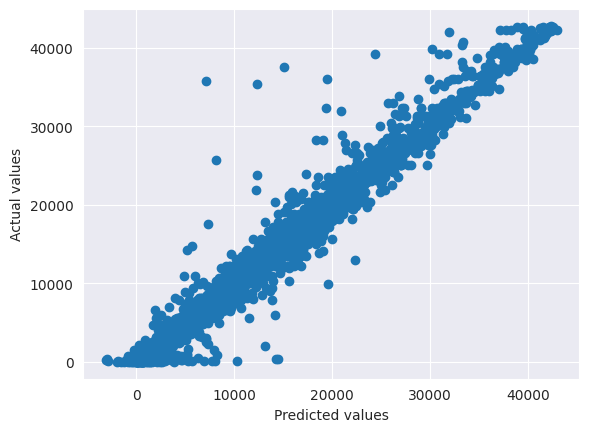

In [173]:
plt.scatter(yhat, y_test)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()